<div style="display: flex; background-color:rgb(214, 234, 248 );" >
<h1 style="text-align: center;margin: auto; padding: 40px; ">Produisez une étude de marché avec Python </h1>
    <p >   
      
</p>
      
  
</div>

# Notebook 2

<a name="top"></a>

# Sommaire :


**Partie 1**
 - <a href="#C1">Importation des libraries</a>

 - <a href="#C2">Importation des données propres</a>
 
**Partie 2 : Les Analyses Sans ACP**
 - <a href="#C3"> 2.1 Classification ascendante hiérarchique sans ACP</a>
 - <a href="#C4"> 2.2 Les définitions des clusters CAH sans ACP</a>
 - <a href="#C5"> 2.3 KMEANS Sans ACP </a>
 - <a href="#C6"> 2.4 Les définitions des clusters Kmeans sans ACP</a>
 - <a href="#C7"> 2.5 Les centroïdes et La Heatmap avec les clusters sans ACP </a>

 
 
**Partie 3 : Les Analyses Avec ACP**
 - <a href="#C8"> Analyse en Composantes Principales (ACP)</a>
 - <a href="#C9">  3.1 Classification ascendante hiérarchique avec ACP</a>
 - <a href="#C10"> 3.2 Les définitions des clusters CAH avec ACP</a>
 - <a href="#C11"> 3.3 KMEANS Avec ACP</a>
 - <a href="#C12"> 3.4 Les définitions des clusters Kmeans avec ACP</a>
 - <a href="#C13"> 3.5 Les centroïdes et La Heatmap avec les clusters avec ACP</a>
 - <a href="#C18"> 3.6 Les analyses avec 3 composantes</a>
 - <a href="#C17"> 3.7 La comparaison des nombres des pays par chaque cluster pour chaque méthode de clustering</a>
 
 
**Partie 4 : Les Clusters KMeans avec ACP montré sur la carte mondiale**
 - <a href="#C14"> Les Clusters KMeans avec ACP montrés sur la carte mondiale</a>
 
**Partie 5 : Conclusion et Recommandations**
 - <a href="#C15">Conclusion et Recommandations </a>
 
**Partie 6 : Sources**
 - <a href="#C16">Sources </a>
 


# <a name="C1">Importation des libraries</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition
import seaborn as sns
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram
import warnings
warnings.filterwarnings("ignore")


# <a name="C2">Importation des données propres</a>

In [2]:
df_final=pd.read_csv("df_final.csv")

In [3]:
df_final.head()

,Pays,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD
0,Afghanistan,1530.0,0.0,29000.0,28000.0,244.0,36296113.0,520.616409,-2.80,68.026904
1,Afrique du Sud,35690.0,63000.0,514000.0,1667000.0,0.0,57009756.0,6121.876572,-0.28,13.333781
2,Albanie,16360.0,0.0,38000.0,13000.0,78.0,2884169.0,4514.204908,0.38,119.099667
3,Algérie,6380.0,0.0,2000.0,275000.0,0.0,41389189.0,4109.696001,-0.92,110.973017
4,Allemagne,19470.0,646000.0,842000.0,1514000.0,18920.0,82658409.0,44651.829102,0.59,0.885206


In [4]:
df=df_final.set_index("Pays")


In [5]:
df.head()

,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD
Pays,,,,,,,,,
Afghanistan,1530.0,0.0,29000.0,28000.0,244.0,36296113.0,520.616409,-2.80,68.026904
Afrique du Sud,35690.0,63000.0,514000.0,1667000.0,0.0,57009756.0,6121.876572,-0.28,13.333781
Albanie,16360.0,0.0,38000.0,13000.0,78.0,2884169.0,4514.204908,0.38,119.099667
Algérie,6380.0,0.0,2000.0,275000.0,0.0,41389189.0,4109.696001,-0.92,110.973017
Allemagne,19470.0,646000.0,842000.0,1514000.0,18920.0,82658409.0,44651.829102,0.59,0.885206


In [6]:
df.dtypes

Dispo aliment(kg/pers/an)              float64
Exportations en tonnes                 float64
Importations en tonnes                 float64
Production en tonnes                   float64
Volaille vendu par France en tonnes    float64
Population                             float64
Pib par habitant $                     float64
Stabilité politique                    float64
Monnaie locale standardisée par USD    float64
dtype: object

In [7]:
df.describe()

,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD
count,172.000000,1.720000e+02,1.720000e+02,1.720000e+02,172.000000,1.720000e+02,172.000000,172.000000,172.000000
mean,20213.372093,1.037500e+05,8.848837e+04,7.083256e+05,1647.790698,4.284175e+07,13962.675602,-0.061163,838.222083
std,15860.311134,4.580661e+05,1.858246e+05,2.474456e+06,7983.319120,1.530637e+08,19378.845762,0.893910,3418.783491
min,130.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,5.204500e+04,25.062000,-2.940000,0.303350
25%,6440.000000,0.000000e+00,3.000000e+03,1.100000e+04,0.000000,2.874480e+06,1966.613013,-0.622500,2.000000
50%,18090.000000,0.000000e+00,1.600000e+04,6.600000e+04,23.000000,9.757833e+06,6024.249890,0.015000,14.360375
75%,30037.500000,1.200000e+04,7.975000e+04,3.687500e+05,437.250000,3.013874e+07,16757.054056,0.650000,168.866963
max,72310.000000,4.223000e+06,1.069000e+06,2.191400e+07,97510.000000,1.421022e+09,111017.182246,1.600000,33226.298152


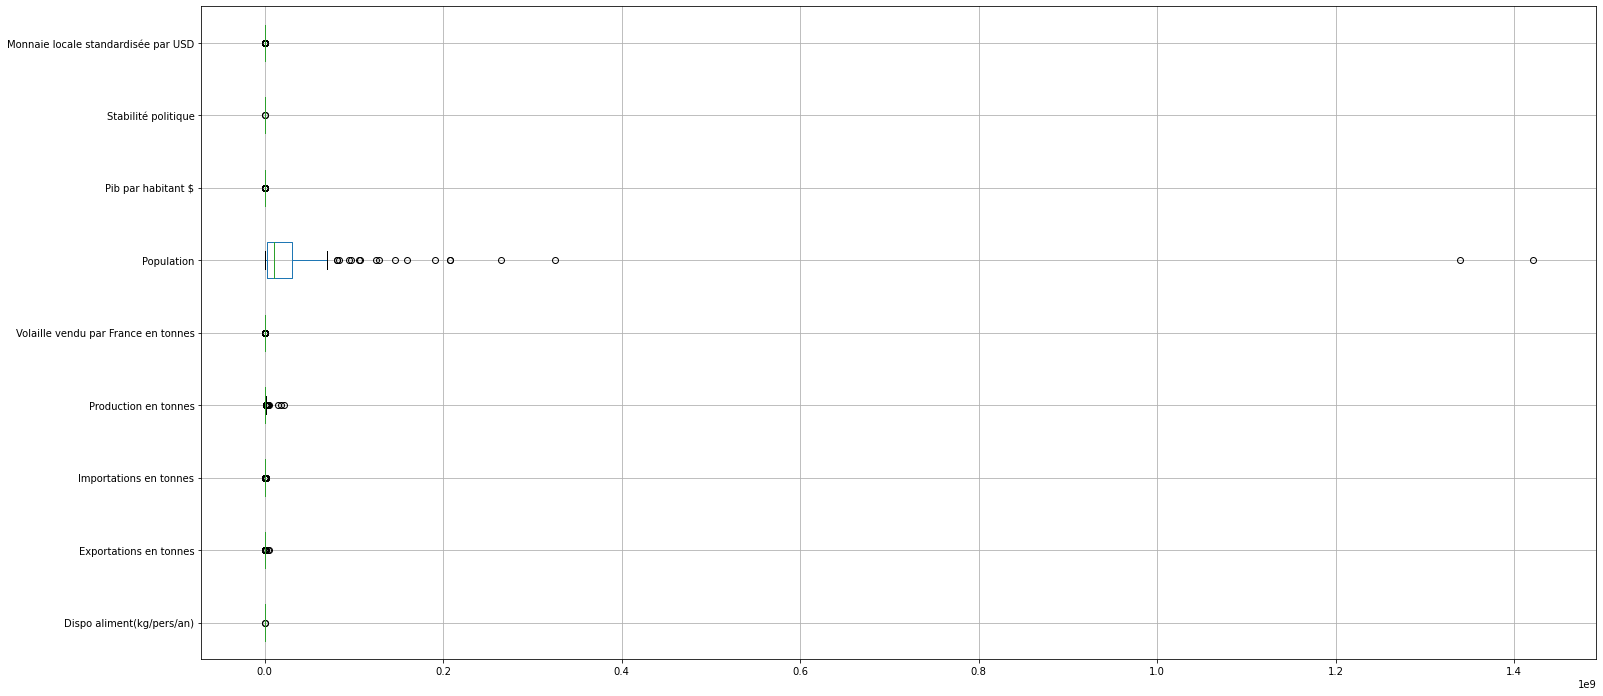

In [8]:
# On vérifie les outliers
fig=plt.figure(figsize=(25,12))
df.boxplot(vert=False)
plt.show()

In [9]:
# On constate les valeurs extrèmes(outliers) pour les colonnes Population et Production en tonnes mais on laisse ces valeurs.

In [10]:
# On voit les corrélations entre les variables
df.corr()

,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD
Dispo aliment(kg/pers/an),1.000000,0.237363,0.181325,0.193015,0.124816,-0.089377,0.371965,0.441372,-0.108855
Exportations en tonnes,0.237363,1.000000,0.160605,0.777650,0.052690,0.208899,0.199112,0.037186,-0.049199
Importations en tonnes,0.181325,0.160605,1.000000,0.195613,0.425994,0.151554,0.260712,0.090042,-0.035307
Production en tonnes,0.193015,0.777650,0.195613,1.000000,-0.003569,0.619022,0.121027,-0.042329,0.023489
Volaille vendu par France en tonnes,0.124816,0.052690,0.425994,-0.003569,1.000000,-0.012517,0.123856,-0.005405,-0.036709
Population,-0.089377,0.208899,0.151554,0.619022,-0.012517,1.000000,-0.045750,-0.151819,0.042209
Pib par habitant $,0.371965,0.199112,0.260712,0.121027,0.123856,-0.045750,1.000000,0.546359,-0.128367
Stabilité politique,0.441372,0.037186,0.090042,-0.042329,-0.005405,-0.151819,0.546359,1.000000,-0.091680
Monnaie locale standardisée par USD,-0.108855,-0.049199,-0.035307,0.023489,-0.036709,0.042209,-0.128367,-0.091680,1.000000


# Les Analyses Sans ACP

### Pendant nos analyses avant de faire les clustering on standardise nos données. Parce que nos unités sont différentes.

#  <a name="C3"> 2.1 Classification ascendante hiérarchique sans ACP</a>

<a href="#top">sommaire</a>

On considère tout d'abord que chaque pays est un cluster. Il y a donc autant de clusters que de pays. Ensuite, on cherche les deux clusters les plus proches, et on les agglomère en un seul cluster. On répète cette étape jusqu'à ce que tous les pays soient regroupés en un seul grand cluster.

###               CAH SANS ACP

Populating the interactive namespace from numpy and matplotlib


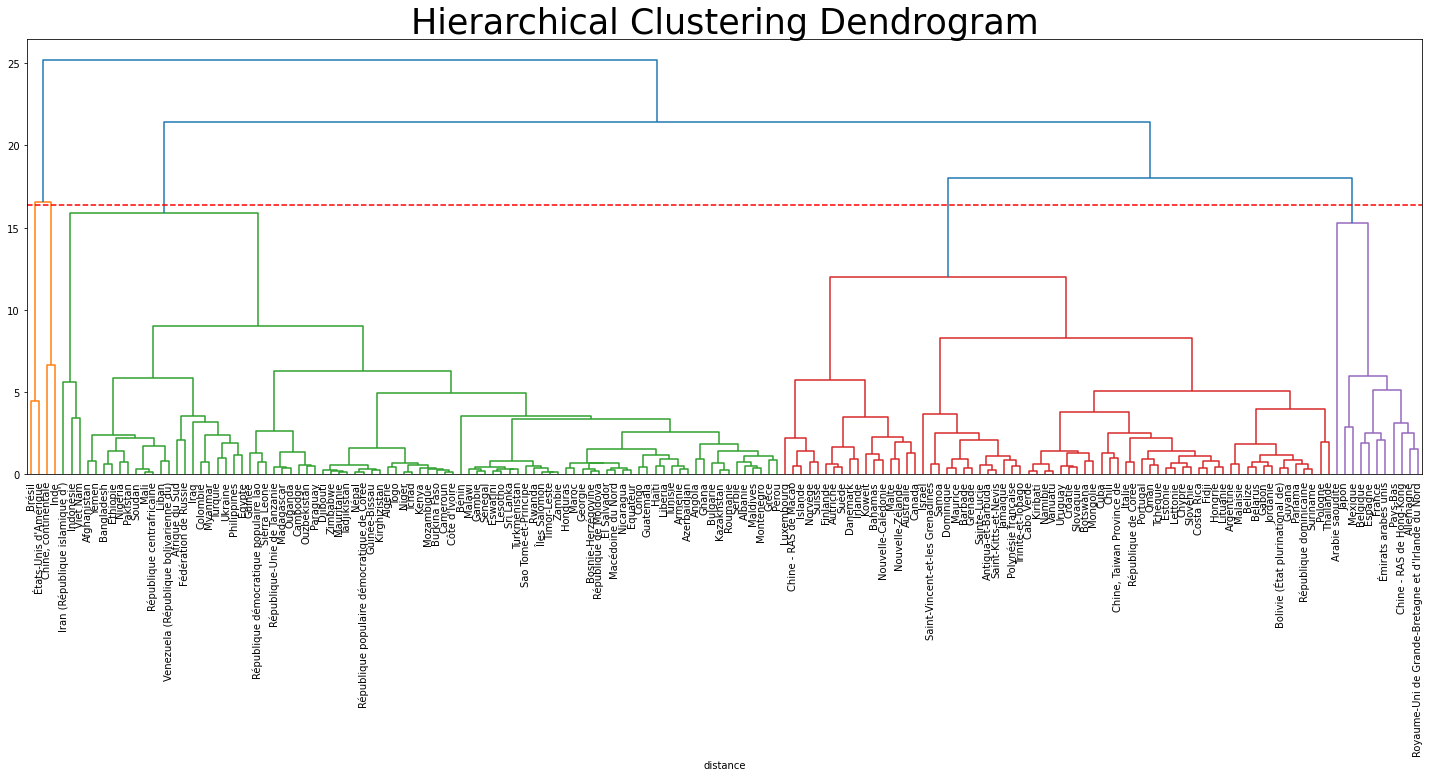

In [11]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn import preprocessing
# import de l'échantillon et des informations relatives aux cours
data = df
plt.rcParams['axes.grid'] = False
# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, 'ward')

# Affichage du dendrogramme
%pylab inline
plt.figure(figsize=(25,8))
plt.title('Hierarchical Clustering Dendrogram',size=35)
plt.xlabel('distance')
dendrogram(Z,labels = names,leaf_font_size= 10,orientation = "top")
plt.axhline(y=16.4, color='r', linestyle='--')
plt.show()


In [12]:
# On peut voir les nombres des pays par chaque cluster

Populating the interactive namespace from numpy and matplotlib


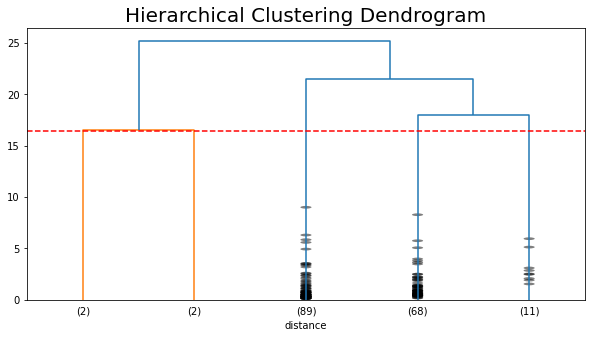

In [13]:
%pylab inline
plt.rcParams['axes.grid'] = False
plt.figure(figsize=(10,5))
plt.title('Hierarchical Clustering Dendrogram',size=20)
plt.xlabel('distance')
dendrogram(Z,labels = names,p=5, truncate_mode='lastp',leaf_font_size=10,orientation = "top",show_contracted=True)
plt.axhline(y=16.4, color='r', linestyle='--')
plt.show()

In [14]:
# On voit les labels des clusters
from scipy.cluster.hierarchy import fcluster
labels = fcluster(Z, 16.4, criterion='distance')
print(labels)


[3 3 3 3 5 3 4 5 4 3 4 4 3 4 3 4 5 4 4 3 4 1 3 3 4 3 4 3 3 4 4 5 4 4 2 4 3
 3 4 4 4 3 4 3 4 3 5 4 3 4 4 5 3 4 3 3 4 3 3 3 3 4 3 3 3 4 2 3 3 3 4 4 4 4
 4 5 4 3 3 3 4 4 3 4 3 3 4 4 3 3 4 3 3 3 4 3 4 3 5 4 3 3 3 4 3 3 3 4 4 4 3
 4 3 3 3 4 3 5 3 4 4 4 3 3 5 3 3 4 3 4 3 3 3 4 4 4 4 3 3 3 4 4 3 3 4 4 4 3
 3 3 4 4 3 3 4 3 3 3 3 4 4 3 3 3 3 3 3 5 3 1 3 3]


In [15]:
clusters_cah = pd.DataFrame({'clusters': labels, 'Pays': data.index})
clusters_cah.head()             

,clusters,Pays
0,3,Afghanistan
1,3,Afrique du Sud
2,3,Albanie
3,3,Algérie
4,5,Allemagne


In [16]:
# On voit les nombres des pays par cluster
clusters_cah["clusters"].value_counts()

3    89
4    68
5    11
1     2
2     2
Name: clusters, dtype: int64

On display les noms de pays par cluster

In [17]:
clusters_cah[clusters_cah["clusters"]==1]

,clusters,Pays
21,1,Brésil
169,1,États-Unis d'Amérique


In [18]:
clusters_cah[clusters_cah["clusters"]==2]

,clusters,Pays
34,2,"Chine, continentale"
66,2,Inde


In [19]:
clusters_cah[clusters_cah["clusters"]==3]["Pays"].unique()

array(['Afghanistan', 'Afrique du Sud', 'Albanie', 'Algérie', 'Angola',
       'Arménie', 'Azerbaïdjan', 'Bangladesh', 'Bosnie-Herzégovine',
       'Bulgarie', 'Burkina Faso', 'Bénin', 'Cambodge', 'Cameroun',
       'Colombie', 'Congo', "Côte d'Ivoire", 'Djibouti', 'El Salvador',
       'Eswatini', 'Fédération de Russie', 'Gambie', 'Ghana', 'Grèce',
       'Guatemala', 'Guinée', 'Guinée-Bissau', 'Géorgie', 'Haïti',
       'Honduras', 'Indonésie', "Iran (République islamique d')", 'Iraq',
       'Kazakhstan', 'Kenya', 'Kirghizistan', 'Lesotho', 'Liban',
       'Libéria', 'Macédoine du Nord', 'Madagascar', 'Malawi', 'Maldives',
       'Mali', 'Maroc', 'Mauritanie', 'Monténégro', 'Mozambique',
       'Myanmar', 'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Ouganda',
       'Ouzbékistan', 'Pakistan', 'Paraguay', 'Philippines', 'Pérou',
       'Roumanie', 'Rwanda', 'République centrafricaine',
       'République de Moldova', 'République démocratique populaire lao',
       'République populaire

In [20]:
clusters_cah[clusters_cah["clusters"]==4]["Pays"].unique()

array(['Antigua-et-Barbuda', 'Argentine', 'Australie', 'Autriche',
       'Bahamas', 'Barbade', 'Belize', 'Bolivie (État plurinational de)',
       'Botswana', 'Bélarus', 'Cabo Verde', 'Canada', 'Chili',
       'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chypre',
       'Costa Rica', 'Croatie', 'Cuba', 'Danemark', 'Dominique',
       'Estonie', 'Fidji', 'Finlande', 'Gabon', 'Grenade', 'Guyana',
       'Hongrie', 'Irlande', 'Islande', 'Israël', 'Italie', 'Jamaïque',
       'Jordanie', 'Kiribati', 'Koweït', 'Lettonie', 'Lituanie',
       'Luxembourg', 'Malaisie', 'Malte', 'Maurice', 'Mongolie',
       'Namibie', 'Norvège', 'Nouvelle-Calédonie', 'Nouvelle-Zélande',
       'Oman', 'Panama', 'Pologne', 'Polynésie française', 'Portugal',
       'République de Corée', 'République dominicaine',
       'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines',
       'Sainte-Lucie', 'Samoa', 'Slovaquie', 'Slovénie', 'Suisse',
       'Suriname', 'Suède', 'Tchéquie', 'Thaïlande', 'Trini

In [21]:
clusters_cah[clusters_cah["clusters"]==5]["Pays"].unique()

array(['Allemagne', 'Arabie saoudite', 'Belgique',
       'Chine - RAS de Hong-Kong', 'Espagne', 'France', 'Japon',
       'Mexique', 'Pays-Bas',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'Émirats arabes unis'], dtype=object)

In [22]:
df_cah=pd.merge(df_final,clusters_cah,on="Pays",how="inner")
df_cah.head()

,Pays,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD,clusters
0,Afghanistan,1530.0,0.0,29000.0,28000.0,244.0,36296113.0,520.616409,-2.80,68.026904,3
1,Afrique du Sud,35690.0,63000.0,514000.0,1667000.0,0.0,57009756.0,6121.876572,-0.28,13.333781,3
2,Albanie,16360.0,0.0,38000.0,13000.0,78.0,2884169.0,4514.204908,0.38,119.099667,3
3,Algérie,6380.0,0.0,2000.0,275000.0,0.0,41389189.0,4109.696001,-0.92,110.973017,3
4,Allemagne,19470.0,646000.0,842000.0,1514000.0,18920.0,82658409.0,44651.829102,0.59,0.885206,5


In [23]:
df_cah.columns

Index(['Pays', 'Dispo aliment(kg/pers/an)', 'Exportations en tonnes',
       'Importations en tonnes', 'Production en tonnes',
       'Volaille vendu par France en tonnes', 'Population',
       'Pib par habitant $', 'Stabilité politique',
       'Monnaie locale standardisée par USD', 'clusters'],
      dtype='object')

In [24]:
# On peut voir les caractéristiques générales des clusters avec les aides des boxplots pour chaque variable

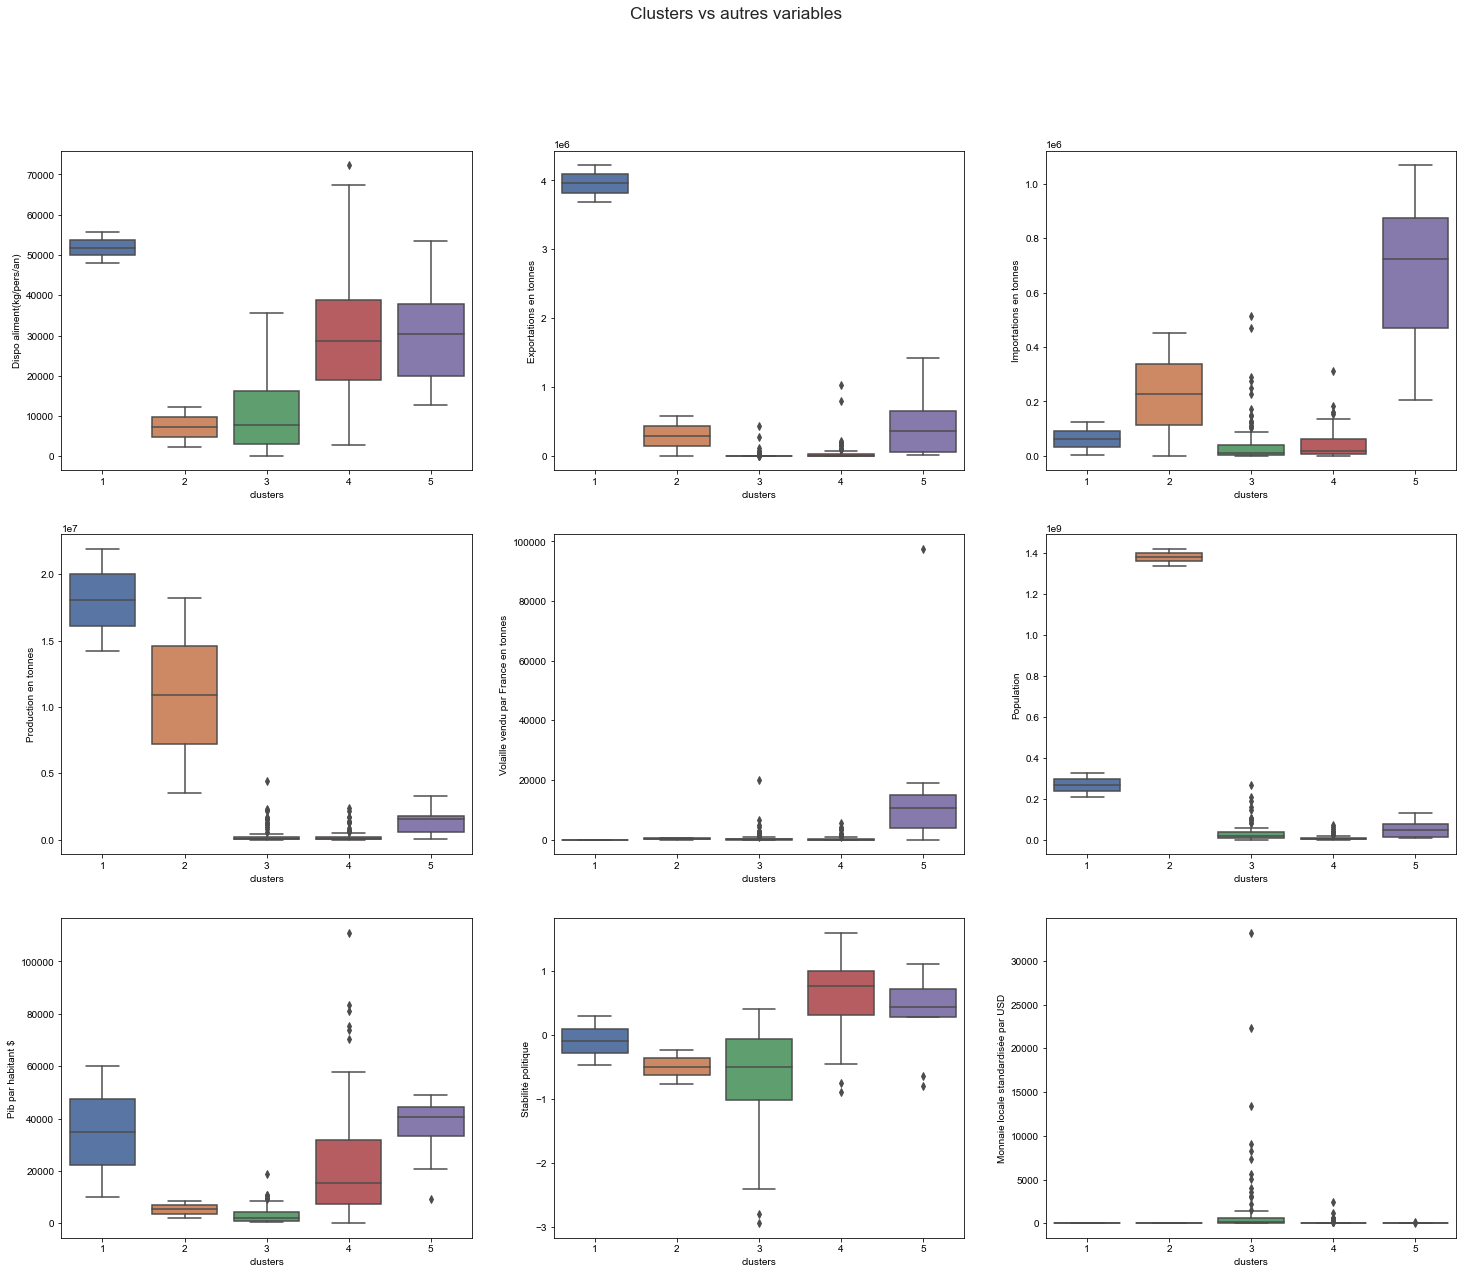

In [25]:
plt.rcParams['axes.grid'] = False
fig, axes = plt.subplots(3, 3, figsize=(25, 20))
sns.set(font_scale=1.2)
data=df_cah
x='clusters'
fig.suptitle('Clusters vs autres variables')
sns.boxplot(ax=axes[0, 0], data=df_cah, x='clusters', y="Dispo aliment(kg/pers/an)")
sns.boxplot(ax=axes[0, 1], data=df_cah, x='clusters', y="Exportations en tonnes")
sns.boxplot(ax=axes[0, 2], data=df_cah, x='clusters', y='Importations en tonnes')
sns.boxplot(ax=axes[1, 0], data=df_cah, x='clusters', y='Production en tonnes')
sns.boxplot(ax=axes[1, 1], data=df_cah, x='clusters', y='Volaille vendu par France en tonnes')
sns.boxplot(ax=axes[1, 2], data=df_cah, x='clusters', y='Population')
sns.boxplot(ax=axes[2, 0], data=df_cah, x='clusters', y='Pib par habitant $')
sns.boxplot(ax=axes[2, 1], data=df_cah, x='clusters', y='Stabilité politique')
sns.boxplot(ax=axes[2, 2], data=df_cah, x='clusters', y='Monnaie locale standardisée par USD');

In [26]:
df_cah.columns

Index(['Pays', 'Dispo aliment(kg/pers/an)', 'Exportations en tonnes',
       'Importations en tonnes', 'Production en tonnes',
       'Volaille vendu par France en tonnes', 'Population',
       'Pib par habitant $', 'Stabilité politique',
       'Monnaie locale standardisée par USD', 'clusters'],
      dtype='object')

In [27]:
# On regarde les moyennes de chaque colonne pour nos analyses
round(df_cah[['Dispo aliment(kg/pers/an)', 'Exportations en tonnes',
       'Importations en tonnes', 'Production en tonnes',
       'Volaille vendu par France en tonnes', 'Population',
       'Pib par habitant $', 'Stabilité politique',
       'Monnaie locale standardisée par USD']].mean(),1)

Dispo aliment(kg/pers/an)                 20213.4
Exportations en tonnes                   103750.0
Importations en tonnes                    88488.4
Production en tonnes                     708325.6
Volaille vendu par France en tonnes        1647.8
Population                             42841754.7
Pib par habitant $                        13962.7
Stabilité politique                          -0.1
Monnaie locale standardisée par USD         838.2
dtype: float64

In [28]:
df_cah.groupby("clusters").mean()

,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD
clusters,,,,,,,,,
1,51855.000000,3.957500e+06,63000.000000,1.805750e+07,0.000000,2.664593e+08,34925.175348,-0.090000,2.095695
2,7275.000000,2.900000e+05,226000.000000,1.089050e+07,317.000000,1.379849e+09,5311.758562,-0.495000,35.940162
3,10398.426966,1.271910e+04,48213.483146,3.364944e+05,682.707865,3.235665e+07,3331.544004,-0.648090,1540.326311
4,30940.294118,5.352941e+04,43676.470588,2.894118e+05,512.529412,8.896043e+06,23875.184559,0.651765,100.846668
5,29912.727273,4.161818e+05,671000.000000,1.300727e+06,17015.727273,5.377197e+07,36462.397214,0.364545,13.773767


# <a name="C4"> 2.2 Les définitions des clusters CAH sans ACP</a>
<a href="#top">sommaire</a>

### Cluster 1 CAH sans PCA    
* Les pays qui sont leader producteur et exportateur 
* Les pays sont économiquement en bon état
* Les pays qui ont assez de volaille pour leurs habitants

In [29]:
df_cah[df_cah["clusters"]==1]

,Pays,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD,clusters
21,Brésil,48030.0,4223000.0,3000.0,14201000.0,0.0,207833823.0,9928.675992,-0.47,3.191389,1
169,États-Unis d'Amérique,55680.0,3692000.0,123000.0,21914000.0,0.0,325084756.0,59921.674703,0.29,1.000000,1


### Cluster 2 CAH sans PCA 

* Les pays les plus peuplés 
* Ils produisent la volaille en deuxième rang parmi les clusters, par contre ils n'ont pas assez de volaille pour leurs habitants.
* Alors ils importent aussi la volaille.
* Economiquement et politiquement ils ne sont pas en très bon état si on regarde ensemble de cluster 



In [30]:
df_cah[df_cah["clusters"]==2]

,Pays,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD,clusters
34,"Chine, continentale",12330.0,576000.0,452000.0,18236000.0,634.0,1.421022e+09,8663.126784,-0.23,6.758755,2
66,Inde,2220.0,4000.0,0.0,3545000.0,0.0,1.338677e+09,1960.390340,-0.76,65.121569,2


### Cluster 3 CAH sans PCA 

* Les pays qui ont la monnaie le plus faible contre US $ 
* Leur production est faible
* Ils importent la volaille.
* Economiquement et politiquement ils ne sont pas en bon état 


In [31]:
df_cah[df_cah["clusters"]==3]

,Pays,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD,clusters
0,Afghanistan,1530.0,0.0,29000.0,28000.0,244.0,36296113.0,520.616409,-2.80,68.026904,3
1,Afrique du Sud,35690.0,63000.0,514000.0,1667000.0,0.0,57009756.0,6121.876572,-0.28,13.333781,3
2,Albanie,16360.0,0.0,38000.0,13000.0,78.0,2884169.0,4514.204908,0.38,119.099667,3
3,Algérie,6380.0,0.0,2000.0,275000.0,0.0,41389189.0,4109.696001,-0.92,110.973017,3
5,Angola,10560.0,0.0,277000.0,42000.0,203.0,29816766.0,4095.811686,-0.38,165.915951,3
...,...,...,...,...,...,...,...,...,...,...,...
165,Zimbabwe,4680.0,0.0,6000.0,69000.0,0.0,14236595.0,1548.186368,-0.71,1.000000,3
166,Égypte,12960.0,1000.0,110000.0,1118000.0,6623.0,96442591.0,2023.331158,-1.42,17.782534,3
168,Équateur,19310.0,0.0,0.0,340000.0,0.0,16785361.0,6213.501276,-0.07,1.000000,3
170,Éthiopie,130.0,0.0,1000.0,14000.0,42.0,106399924.0,721.753494,-1.68,23.866104,3


### Cluster 4 CAH sans PCA

* Leur production est très faible.
* Leur importation est aussi faible
* Les pays les plus stable politiquement.
* Ils ont assez de volaille pour leurs habitants par contre leur production et importation faible.
* Peut être leur population n'est pas forte c'est la raison pour la quelle ils ont assez de volaille par habitant 
* Economiquement et politiquement ils sont en bon état sauf quelque exceptions




In [32]:
df_cah[df_cah["clusters"]==4]

,Pays,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD,clusters
6,Antigua-et-Barbuda,54100.0,0.0,7000.0,0.0,0.0,95426.0,15383.415188,0.75,2.700000,4
8,Argentine,42240.0,207000.0,8000.0,2161000.0,0.0,43937140.0,14648.845969,0.17,16.562707,4
10,Australie,47650.0,42000.0,16000.0,1269000.0,0.0,24584620.0,57628.863849,0.90,1.304758,4
11,Autriche,18200.0,78000.0,110000.0,148000.0,456.0,8819901.0,47309.051637,1.05,0.885206,4
13,Bahamas,43170.0,0.0,24000.0,6000.0,0.0,381755.0,32376.129780,0.99,1.000000,4
...,...,...,...,...,...,...,...,...,...,...,...
150,Tchéquie,21960.0,27000.0,116000.0,163000.0,832.0,10641034.0,20545.836143,1.00,23.376333,4
151,Thaïlande,12950.0,796000.0,2000.0,1676000.0,9.0,69209810.0,6593.816870,-0.75,33.939811,4
154,Trinité-et-Tobago,54540.0,0.0,23000.0,61000.0,0.0,1384059.0,16747.918804,0.28,6.779525,4
159,Uruguay,9120.0,3000.0,3000.0,33000.0,0.0,3436641.0,18690.915595,1.05,28.676400,4


### Cluster 5 CAH sans PCA 

* Les pays qui sont politiquement stable .
* Economiquement et politiquement ils sont en bon état sauf qq exceptions
* Les pays importent le plus fortement.
* Les pays déjà importent la volaille de France.
* **Ils peuvent être notre cible par contre il y a un risque de concurrence.**

In [33]:
df_cah[df_cah["clusters"]==5]

,Pays,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD,clusters
4,Allemagne,19470.0,646000.0,842000.0,1514000.0,18920.0,82658409.0,44651.829102,0.59,0.885206,5
7,Arabie saoudite,43360.0,10000.0,722000.0,616000.0,97510.0,33101179.0,20802.464299,-0.64,3.750000,5
16,Belgique,12650.0,656000.0,338000.0,463000.0,12577.0,11419748.0,44025.903247,0.43,0.885206,5
31,Chine - RAS de Hong-Kong,53510.0,663000.0,907000.0,24000.0,10404.0,7306322.0,46705.027813,0.83,7.793250,5
46,Espagne,30390.0,212000.0,205000.0,1515000.0,13441.0,46647428.0,28137.441564,0.28,0.885206,5
51,France,22900.0,501000.0,506000.0,1750000.0,0.0,64842509.0,38720.645922,0.28,0.885206,5
75,Japon,18500.0,10000.0,1069000.0,2215000.0,122.0,127502725.0,38672.407740,1.11,112.166141,5
98,Mexique,32520.0,9000.0,972000.0,3249000.0,0.0,124777324.0,9287.841557,-0.80,18.926517,5
117,Pays-Bas,20330.0,1418000.0,608000.0,1100000.0,16149.0,17021347.0,48989.638816,0.92,0.885206,5
124,Royaume-Uni de Grande-Bretagne et d'Irlande du...,31940.0,359000.0,779000.0,1814000.0,10493.0,66727461.0,40448.365256,0.39,0.777003,5


In [34]:
df_cah[df_cah["clusters"]==5]["Pays"].unique()

array(['Allemagne', 'Arabie saoudite', 'Belgique',
       'Chine - RAS de Hong-Kong', 'Espagne', 'France', 'Japon',
       'Mexique', 'Pays-Bas',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'Émirats arabes unis'], dtype=object)

#  <a name="C5">    2.3 KMEANS Sans ACP </a>

<a href="#top">sommaire</a>

L'algorithme du k-means permet de rechercher efficacement une partition des données dont la variance intracluster est minimale.

### Kmeans Sans ACP

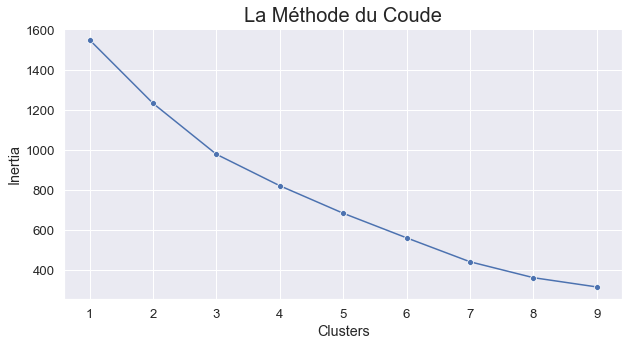

In [35]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 10):
    km = KMeans(n_clusters=i).fit(X_scaled)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax,marker="o")

ax.set_title('La Méthode du Coude',size=20)
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

In [36]:
# Avec la méthode du coude on peut définir notre nombre de cluster
# Selon le graphique et pour rester le même nombre de cluster de CAH on va utiliser 5 cluster

(172, 9)
Populating the interactive namespace from numpy and matplotlib


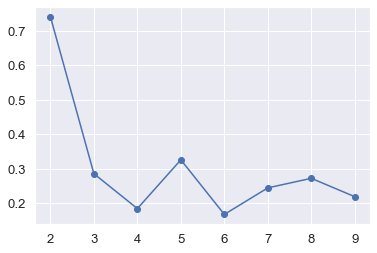

In [37]:
print(X_scaled.shape)
%pylab inline
from sklearn import metrics
silhouettes= []
for num_clusters in range (2,10):
    cls=KMeans(n_clusters=num_clusters, n_init=1, init='random')
    cls.fit(X_scaled)
    silh=metrics.silhouette_score(X_scaled,cls.labels_)
    silhouettes.append(silh)
plt.plot(range(2,10),silhouettes, marker="o");


In [38]:
# Le graphique de silhouette nous montre la distance entre les clusters
# On peut choisir 5 clusters selon le graphique

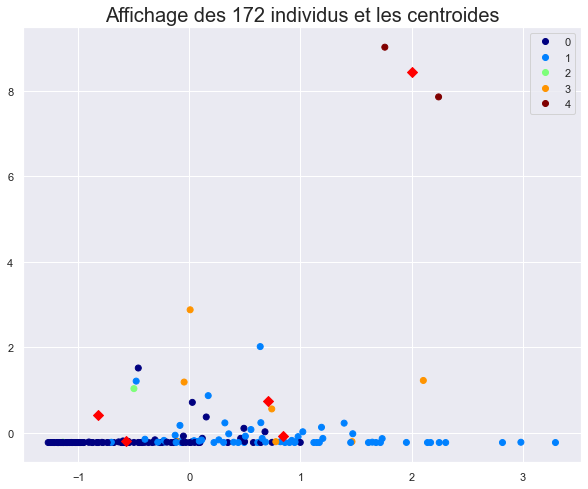

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
sns.set(font_scale=1)
# Nombre de clusters souhaités
n_clust = 5

# import de l'échantillon
data = df

# préparation des données pour le clustering
X = data.values
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust,random_state=3)
km.fit(X_scaled)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering des individus 
fig=plt.figure(figsize=(10,8))
scatter=plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap = 'jet', alpha=1)
plt.title("Affichage des {} individus et les centroides".format(X_scaled.shape[0]),size=20)
classes=["0","1","2","3","4"]
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
#for i,(x,y) in enumerate(X_projected[:,[0,1]]):
                    #plt.text(x, y, df.index[i], fontsize='13')(si on voulait display les noms des individus)


# On définit des cluster centers: centroids
centroids=np.array(km.cluster_centers_)
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# On fait un scatter plot des centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50,c='red')
plt.show(block=False)


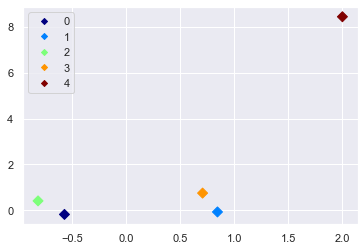

In [40]:
# On montre les cluster centers: centroids
centroids=np.array(km.cluster_centers_)
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# On fait un scatter plot des centroids_x and centroids_y
scatter=plt.scatter(centroids_x,centroids_y,marker='D',s=50,c=[0,1,2,3,4],cmap='jet')
classes=["0","1","2","3","4"]
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()


In [41]:
liste_pays_km=pd.DataFrame({"Pays":df.index,"Clusters":clusters})
liste_pays_km

,Pays,Clusters
0,Afghanistan,0
1,Afrique du Sud,1
2,Albanie,0
3,Algérie,0
4,Allemagne,3
...,...,...
167,Émirats arabes unis,1
168,Équateur,0
169,États-Unis d'Amérique,4
170,Éthiopie,0


In [42]:
liste_pays_km["Clusters"].value_counts()

0    101
1     60
3      7
4      2
2      2
Name: Clusters, dtype: int64

In [43]:
df_km=pd.merge(df_final,liste_pays_km,on="Pays",how='inner')
df_km.head()

,Pays,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD,Clusters
0,Afghanistan,1530.0,0.0,29000.0,28000.0,244.0,36296113.0,520.616409,-2.80,68.026904,0
1,Afrique du Sud,35690.0,63000.0,514000.0,1667000.0,0.0,57009756.0,6121.876572,-0.28,13.333781,1
2,Albanie,16360.0,0.0,38000.0,13000.0,78.0,2884169.0,4514.204908,0.38,119.099667,0
3,Algérie,6380.0,0.0,2000.0,275000.0,0.0,41389189.0,4109.696001,-0.92,110.973017,0
4,Allemagne,19470.0,646000.0,842000.0,1514000.0,18920.0,82658409.0,44651.829102,0.59,0.885206,3


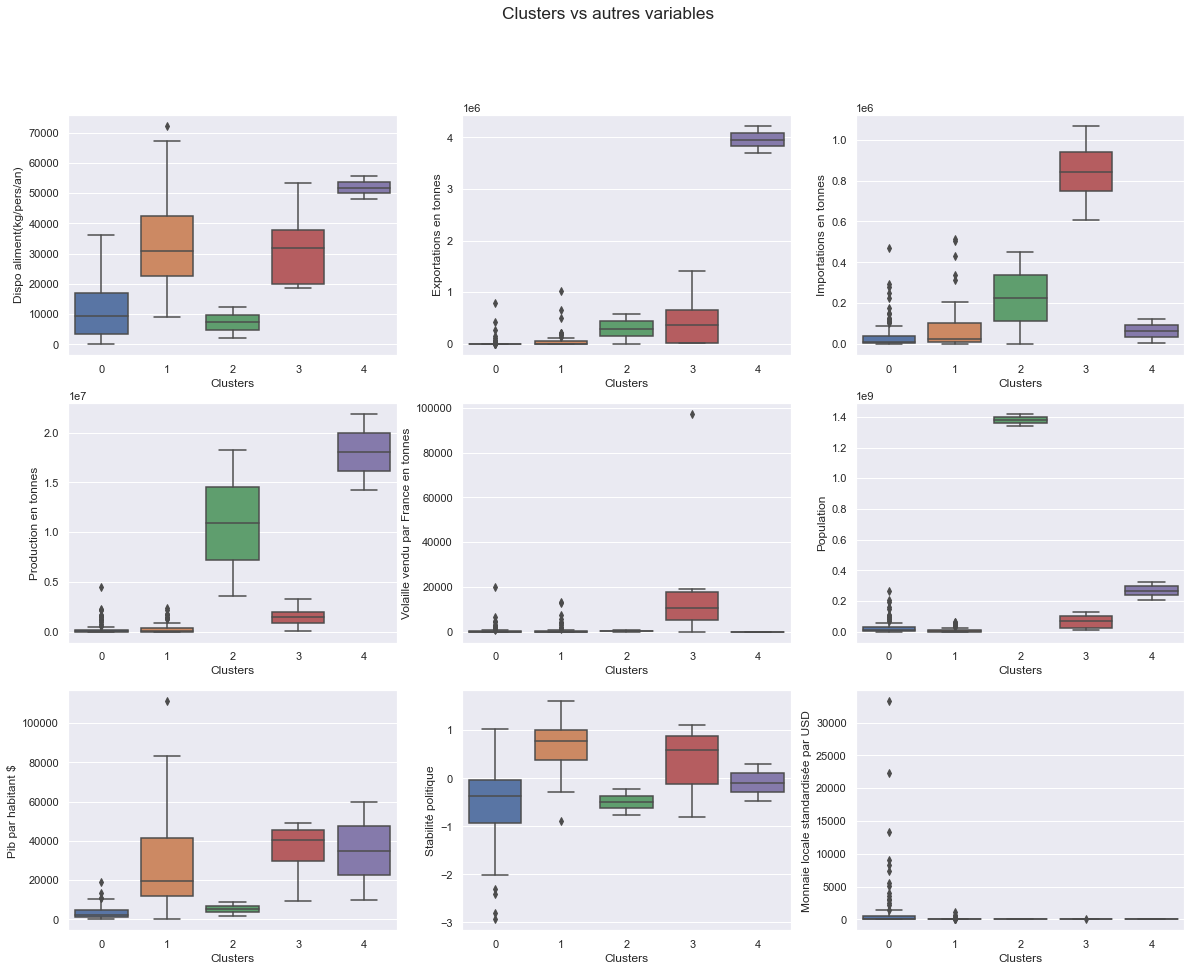

In [44]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
sns.set(font_scale=1.2)
data=df_km
x='Clusters'
fig.suptitle('Clusters vs autres variables')
sns.boxplot(ax=axes[0, 0], data=df_km, x='Clusters', y="Dispo aliment(kg/pers/an)")
sns.boxplot(ax=axes[0, 1], data=df_km, x='Clusters', y="Exportations en tonnes")
sns.boxplot(ax=axes[0, 2], data=df_km, x='Clusters', y='Importations en tonnes')
sns.boxplot(ax=axes[1, 0], data=df_km, x='Clusters', y='Production en tonnes')
sns.boxplot(ax=axes[1, 1], data=df_km, x='Clusters', y='Volaille vendu par France en tonnes')
sns.boxplot(ax=axes[1, 2], data=df_km, x='Clusters', y='Population')
sns.boxplot(ax=axes[2, 0], data=df_km, x='Clusters', y='Pib par habitant $')
sns.boxplot(ax=axes[2, 1], data=df_km, x='Clusters', y='Stabilité politique')
sns.boxplot(ax=axes[2, 2], data=df_km, x='Clusters', y='Monnaie locale standardisée par USD');

In [45]:
# On peut voir les caractéristiques générales des clusters avec l'aides des boxplots pour chaque variable

#  <a name="C6">    2.4 Les définitions des clusters Kmeans sans ACP </a>

<a href="#top">sommaire</a>

### Cluster 0 KMEANS sans PCA

* Les pays qui ont la production faible
* Leur PIB est faible aussi donc ils sont économiquement faible
* Les pays qui sont politiquement pas très stable

In [46]:
liste_pays_km[liste_pays_km["Clusters"]==0]["Pays"].unique()

array(['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Arménie',
       'Azerbaïdjan', 'Bangladesh', 'Belize',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Bulgarie', 'Burkina Faso', 'Bélarus', 'Bénin',
       'Cabo Verde', 'Cambodge', 'Cameroun', 'Colombie', 'Congo',
       'Croatie', "Côte d'Ivoire", 'Djibouti', 'El Salvador', 'Eswatini',
       'Fédération de Russie', 'Gabon', 'Gambie', 'Ghana', 'Grèce',
       'Guatemala', 'Guinée', 'Guinée-Bissau', 'Géorgie', 'Haïti',
       'Honduras', 'Indonésie', "Iran (République islamique d')", 'Iraq',
       'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Kiribati',
       'Lesotho', 'Liban', 'Libéria', 'Macédoine du Nord', 'Madagascar',
       'Malawi', 'Maldives', 'Mali', 'Maroc', 'Mauritanie', 'Mongolie',
       'Monténégro', 'Mozambique', 'Myanmar', 'Namibie', 'Nicaragua',
       'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Ouzbékistan', 'Pakistan',
       'Paraguay', 'Philippines', 'Pérou', 'Rouman

### Cluster 1 KMEANS sans PCA

* Les pays qui ont la production faible
* Leur importation n'est pas très forte
* Leur PIB est bien
* Les pays qui sont politiquement stable

In [47]:
liste_pays_km[liste_pays_km["Clusters"]==1]["Pays"].unique()

array(['Afrique du Sud', 'Antigua-et-Barbuda', 'Argentine', 'Australie',
       'Autriche', 'Bahamas', 'Barbade', 'Belgique', 'Canada', 'Chili',
       'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chypre',
       'Costa Rica', 'Cuba', 'Danemark', 'Dominique', 'Espagne',
       'Estonie', 'Fidji', 'Finlande', 'France', 'Grenade', 'Guyana',
       'Hongrie', 'Irlande', 'Islande', 'Israël', 'Italie', 'Jamaïque',
       'Koweït', 'Lettonie', 'Lituanie', 'Luxembourg', 'Malaisie',
       'Malte', 'Maurice', 'Norvège', 'Nouvelle-Calédonie',
       'Nouvelle-Zélande', 'Oman', 'Panama', 'Pologne',
       'Polynésie française', 'Portugal', 'République de Corée',
       'République dominicaine', 'Saint-Kitts-et-Nevis',
       'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa',
       'Slovaquie', 'Slovénie', 'Suisse', 'Suriname', 'Suède', 'Tchéquie',
       'Trinité-et-Tobago', 'Uruguay', 'Émirats arabes unis'],
      dtype=object)

### Cluster 2 KMEANS sans PCA

* Les pays les plus peuplés 
* Ils produisent la volaille en deuxième rang parmi les clusters, par contre ils n'ont pas assez de volaille pour leurs habitants.
* Alors ils importent aussi la volaille.
* Economiquement et politiquement ils ne sont pas en bon état 

In [48]:
liste_pays_km[liste_pays_km["Clusters"]==2]["Pays"].unique()

array(['Chine, continentale', 'Inde'], dtype=object)

### Cluster 3 KMEANS sans PCA

* Les pays qui sont politiquement stable .
* Economiquement et politiquement ils sont en bon état sauf qulques exceptions
* Les pays qui importent le plus fortement.
* Les pays qui déjà importent volaille de France.
* **Ils peuvent être notre cible par contre il y a un risque de concurrence.**

In [49]:
liste_pays_km[liste_pays_km["Clusters"]==3]["Pays"].unique()

array(['Allemagne', 'Arabie saoudite', 'Chine - RAS de Hong-Kong',
       'Japon', 'Mexique', 'Pays-Bas',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"],
      dtype=object)

### Cluster 4 KMEANS sans PCA

* Les pays leader producteur et exportateur
* Les pays qui sont économiquement en bon état 
* Les pays qui ont assez de volaille pour leurs habitants

In [50]:
liste_pays_km[liste_pays_km["Clusters"]==4]["Pays"].unique()

array(['Brésil', "États-Unis d'Amérique"], dtype=object)

## Les clusters avec les méthodes  CAH et KMeans sont cohérants et ils ressembelent

#  <a name="C7">    2.5 Les centroïdes et La Heatmap avec les clusters sans ACP </a>

<a href="#top">sommaire</a>

In [51]:
centroids=km.cluster_centers_
centroids

array([[-0.57351899, -0.18256561, -0.26255306, -0.16161755, -0.12494263,
        -0.09013399, -0.53769539, -0.52578813,  0.16183483],
       [ 0.8436519 , -0.07469725, -0.05309898, -0.13755202, -0.07465681,
        -0.2065164 ,  0.75292956,  0.84949619, -0.22842257],
       [-0.8181522 ,  0.40778784,  0.74216819,  4.12692814, -0.16718312,
         8.76047753, -0.44771373, -0.48674216, -0.235354  ],
       [ 0.70584574,  0.74715491,  4.07065565,  0.3227257 ,  2.5495706 ,
         0.1490204 ,  1.12244716,  0.45328877, -0.23981291],
       [ 2.00084426,  8.43765046, -0.13756407,  7.03177859, -0.20700685,
         1.46520969,  1.08487907, -0.03235381, -0.24528246]])

In [52]:
df_centr_value=pd.DataFrame(centroids,columns=df.columns).T
df_centr_value

,0,1,2,3,4
Dispo aliment(kg/pers/an),-0.573519,0.843652,-0.818152,0.705846,2.000844
Exportations en tonnes,-0.182566,-0.074697,0.407788,0.747155,8.437650
Importations en tonnes,-0.262553,-0.053099,0.742168,4.070656,-0.137564
Production en tonnes,-0.161618,-0.137552,4.126928,0.322726,7.031779
Volaille vendu par France en tonnes,-0.124943,-0.074657,-0.167183,2.549571,-0.207007
Population,-0.090134,-0.206516,8.760478,0.149020,1.465210
Pib par habitant $,-0.537695,0.752930,-0.447714,1.122447,1.084879
Stabilité politique,-0.525788,0.849496,-0.486742,0.453289,-0.032354
Monnaie locale standardisée par USD,0.161835,-0.228423,-0.235354,-0.239813,-0.245282


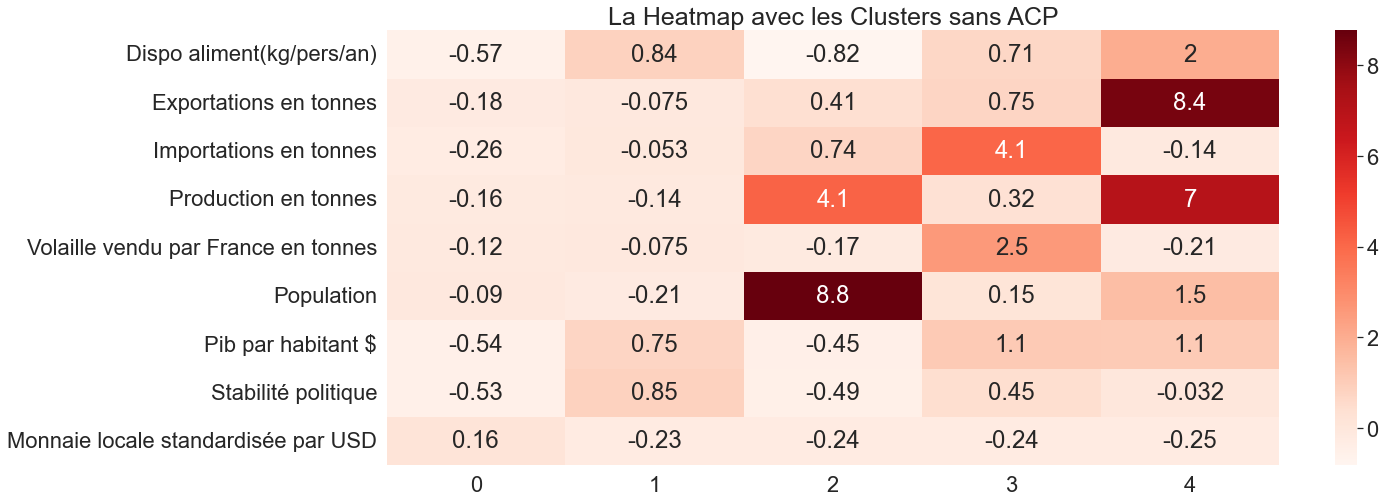

In [53]:
fig=plt.figure(figsize=(20,8))
sns.set(font_scale=2)
plt.title("La Heatmap avec les Clusters sans ACP",size=25)
sns.heatmap(pd.DataFrame(centroids,columns=df.columns).T, annot = True,cmap="Reds");

In [54]:
df_km.groupby(by='Clusters').mean()

,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD
Clusters,,,,,,,,,
0,11143.663366,2.036634e+04,39841.584158,3.095743e+05,653.237624,2.908567e+07,3573.094209,-0.529802,1389.889611
1,33555.000000,6.963333e+04,78650.000000,3.689500e+05,1053.516667,1.132361e+07,28511.104101,0.696000,59.568209
2,7275.000000,2.900000e+05,226000.000000,1.089050e+07,317.000000,1.379849e+09,5311.758562,-0.495000,35.940162
3,31375.714286,4.450000e+05,842714.285714,1.504571e+06,21942.571429,6.558497e+07,35651.082083,0.342857,20.740474
4,51855.000000,3.957500e+06,63000.000000,1.805750e+07,0.000000,2.664593e+08,34925.175348,-0.090000,2.095695


### Les analyses avec heatmap sont cohérantes avec nos analyses précedentes

Cluster 0 selon heatmap
* Les pays leur production est faible
* Leur PIB est faible aussi donc économiquement faible
* Les pays sont politiquement pas très stable

Cluster 1 selon heatmap
* Les pays leur production est faible
* Leur importation n'est pas très fort
* Leur PIB est bien
* Les pays sont politiquement stable

Cluster 2 selon heatmap
* Les pays plus peuplés 
* Ils produisent la volaille en deuxième rang parmi les clusters, par contre ils n'ont pas assez de volaille pour leurs habitants.
* Alors ils importent aussi la volaille.
* Economiquement et politiquement ils ne sont pas en bon état 

Cluster 3 selon heatmap
* Les pays sont politiquement stable .
* Economiquement et politiquement ils sont en bon état sauf qq exceptions
* Les pays importent le plus fortement.
* Les pays déjà importent volaille de France.
* **Ils peuvent être notre cible par contre il y a un risque de concurence.**

Cluster 4 selon heatmap
* Les pays leader producteur et exportateur
* Les pays sont économiquement en bonne état 
* Les pays ont assez de volaille pour leurs habitants

# Les Analyses Avec ACP

#  <a name="C8"> Analyse en Composantes Principales (ACP) </a>

<a href="#top">sommaire</a>

On utilise ACP pour réduire les diménsions de notre data pour mieux afficher nos individus et faire nos analyses plus facilement. Notre but est de obtenir minimum de dimension en gardant maximum de data.

In [55]:
# On crée les fonctions pour illustrer nos résultats de pca
# On utilise les codes fournis pendant les cours

In [56]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd


def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)
        
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(10,10))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='12', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

### ACP

In [57]:
# On voit les sommes cumulative des variances expliquées
from sklearn import decomposition
pca=decomposition.PCA()
pca.fit(X_scaled)
print (pca.explained_variance_ratio_.cumsum())
X_trans=pca.transform(X_scaled)

[0.26948897 0.48371451 0.62704617 0.73433918 0.82142481 0.88876587
 0.94634668 0.98938656 1.        ]


In [58]:
# On constate que avec premières 4 composantes on peut representer %73 de notre data

Populating the interactive namespace from numpy and matplotlib


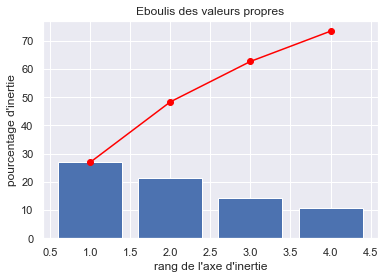

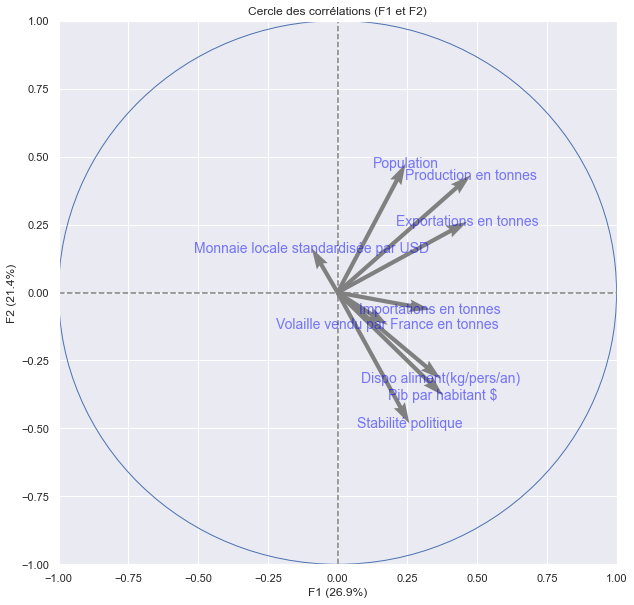

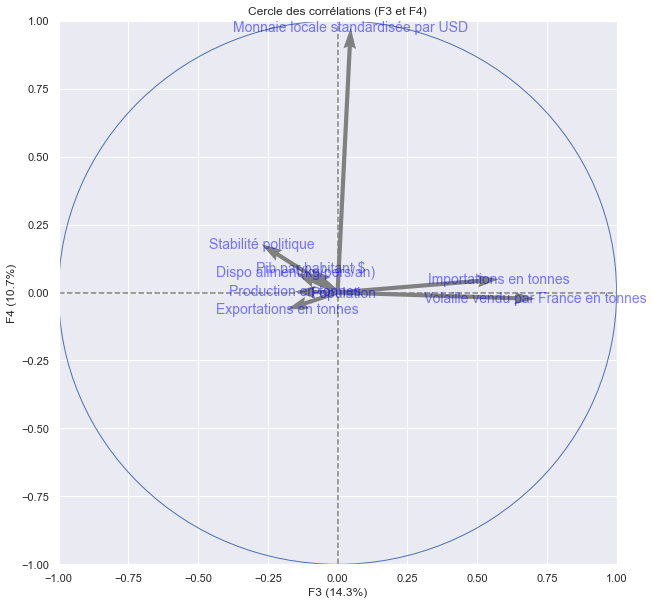

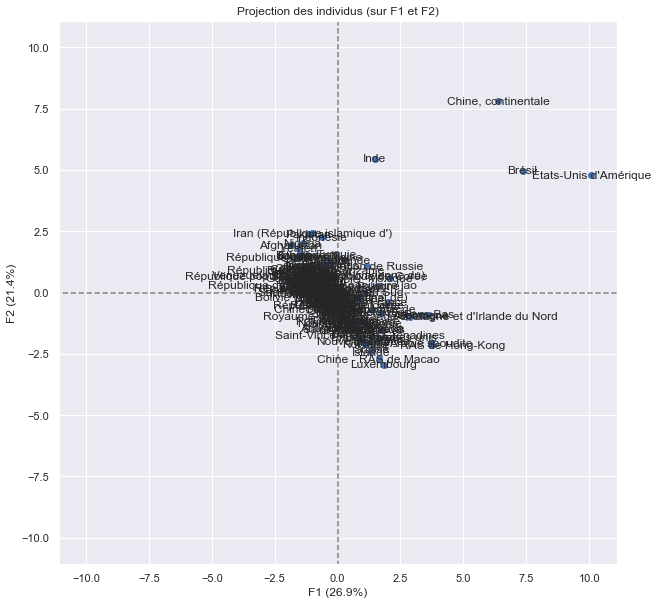

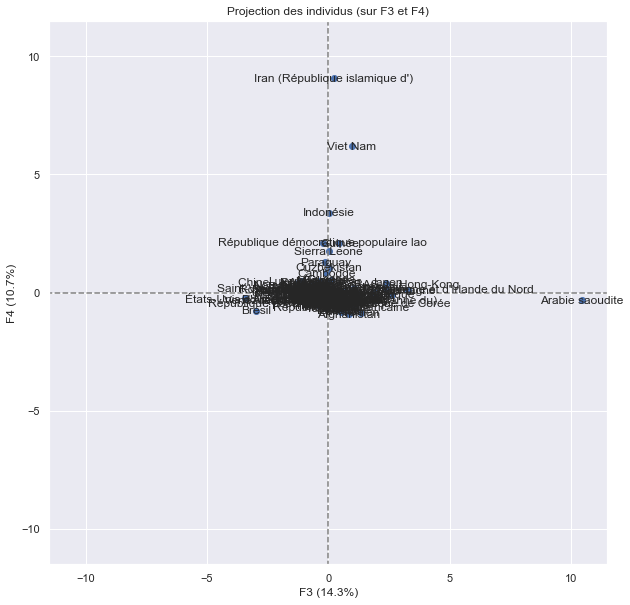

In [59]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing

sns.set(font_scale=1)

# choix du nombre de composantes à calculer
n_comp = 4

# import de l'échantillon
data = df
# préparation des données pour l'ACP

X = data.values
names = data.index 
features = data.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
%pylab inline
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))
plt.show()

# Commentaires pour les cercles des corrélation des variables


## Premier cercle de corrélation(F1 et F2)

On constate que 
* Toutes les variables sont positivement corrélées avec première axe de factoriele F1 sauf monnaie locale
* Les variables disponibilité alimentaire et PIB par habitant sont très corrélées entre eux et avec F1
* Les variables Production en tonnes et Expotration en tonnes sont aussi corrélées entre eux et avec F1
* La variable Importation en tonnes est quasiment indépendente de F2 et n'est pas beaucoup corrélée avec les autres variables
* On peut definir le F1 comme importation et exportation de volaille
* On peut definir le F2 comme la population et stabilité politique(négativement corrélée)


## Deuxieme cercle de corrélation(F3 et F4)

On constate que
* Les variables Importation en tonnes et Volaille vendu par la France sont très corrélées entre eux et avec F3
* Ces variables sont corrélées positivement avec F3 et les autres sont corrélées négativement
* La monnaie locale est quasiement indépendente de l'axe F3
* On peut définir le F3 comme importation de volaille
* On peut définir le F4 comme La monnaie locale

# Commentaires pour les liens entre les individus

## Projection des individus (sur F1 et F2)

* On constate que certaines pays sont détachés des autres
* On peut les considérer comme les outliers.
* L'Inde et Chine sont les pays plus peuplés que les autres.
* Brésil et Etas-Unis sont des pays qui produissent la volaille beacoup plus que les autres.

## Projection des individus (sur F3 et F4)

* On constate que certaines pays sont détachés des autres
* On peut les considérer comme les outliers
* Arabie Saoudite import beacoup de volaille de France
* Iran, Vietnam et Indonésie sont des pays qui ont des monnaies très faibles contre US $

#  <a name="C9">    3.1 Classification ascendante hiérarchique avec ACP </a>

<a href="#top">sommaire</a>

### CAH avec ACP

Populating the interactive namespace from numpy and matplotlib


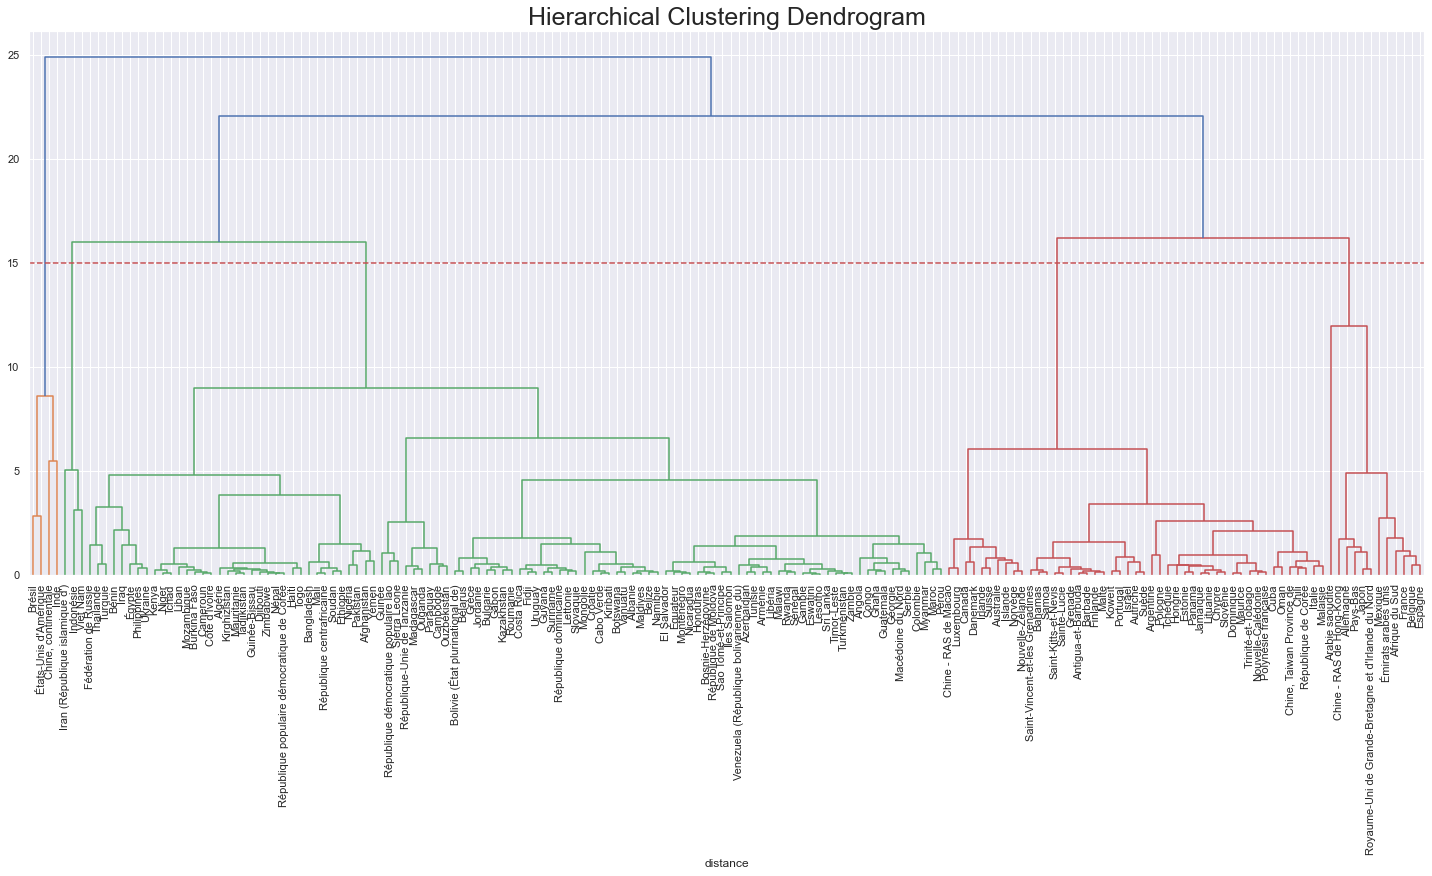

In [60]:
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.cluster.hierarchy import dendrogram
from sklearn import preprocessing

# import de l'échantillon et des informations relatives aux cours
data = df

# préparation des données pour le clustering
X = data.values
names = data.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

fig=plt.figure(figsize=(10,8))
pca = decomposition.PCA(n_components=4).fit(X_scaled)
X_projected = pca.transform(X_scaled)

# Clustering hiérarchique
Z = linkage(X_projected, 'ward')

# Affichage du dendrogramme
%pylab inline
#sns.set_style('ticks')
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram',size=25)
plt.xlabel('distance')
dendrogram(Z,labels = names,leaf_font_size= 11,orientation = "top")
plt.axhline(y=15, color='r', linestyle='--')
plt.show()


Populating the interactive namespace from numpy and matplotlib


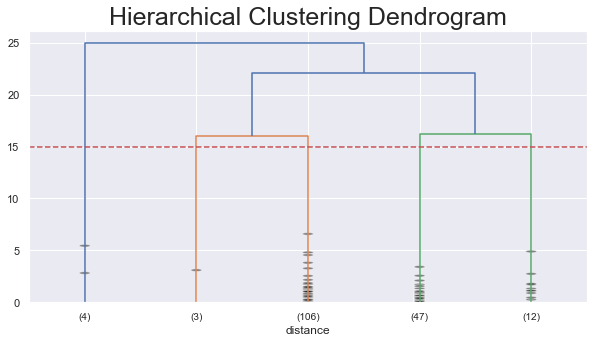

In [61]:
%pylab inline
plt.figure(figsize=(10,5))
plt.title('Hierarchical Clustering Dendrogram',size=25)
plt.xlabel('distance')
dendrogram(Z,labels = names,p=5, truncate_mode='lastp',leaf_font_size=10,orientation = "top",show_contracted=True)
plt.axhline(y=15, color='r', linestyle='--')
plt.show()

In [62]:
from scipy.cluster.hierarchy import fcluster
labels = fcluster(Z, 15, criterion='distance')
print(labels)

[3 5 3 3 5 3 4 5 4 3 4 4 3 4 3 4 5 3 3 3 3 1 3 3 3 3 3 3 3 4 4 5 4 4 1 4 3
 3 3 3 4 3 4 3 4 3 5 4 3 3 4 5 3 3 3 3 4 3 3 3 3 3 3 3 3 4 1 2 2 3 4 4 4 4
 4 5 3 3 3 3 3 4 3 3 3 3 4 4 3 3 4 3 3 3 4 3 4 3 5 3 3 3 3 3 3 3 3 4 4 4 3
 4 3 3 3 4 3 5 3 4 4 4 3 3 5 3 3 4 3 3 3 3 3 4 4 4 4 3 3 3 3 4 3 3 4 3 4 3
 3 3 4 3 3 3 4 3 3 3 3 3 3 3 2 3 3 3 3 5 3 1 3 3]


In [63]:
clusters_cah_pca = pd.DataFrame({'clusters': labels, 'Pays': data.index})
clusters_cah_pca.head()             

,clusters,Pays
0,3,Afghanistan
1,5,Afrique du Sud
2,3,Albanie
3,3,Algérie
4,5,Allemagne


In [64]:
clusters_cah_pca["clusters"].value_counts()

3    106
4     47
5     12
1      4
2      3
Name: clusters, dtype: int64

#  <a name="C10">    3.2 Les définitions des clusters CAH avec ACP </a>

<a href="#top">sommaire</a>

In [65]:
df_cah_pca=pd.merge(df_final,clusters_cah_pca,on="Pays",how="inner")
df_cah_pca.head()

,Pays,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD,clusters
0,Afghanistan,1530.0,0.0,29000.0,28000.0,244.0,36296113.0,520.616409,-2.80,68.026904,3
1,Afrique du Sud,35690.0,63000.0,514000.0,1667000.0,0.0,57009756.0,6121.876572,-0.28,13.333781,5
2,Albanie,16360.0,0.0,38000.0,13000.0,78.0,2884169.0,4514.204908,0.38,119.099667,3
3,Algérie,6380.0,0.0,2000.0,275000.0,0.0,41389189.0,4109.696001,-0.92,110.973017,3
4,Allemagne,19470.0,646000.0,842000.0,1514000.0,18920.0,82658409.0,44651.829102,0.59,0.885206,5


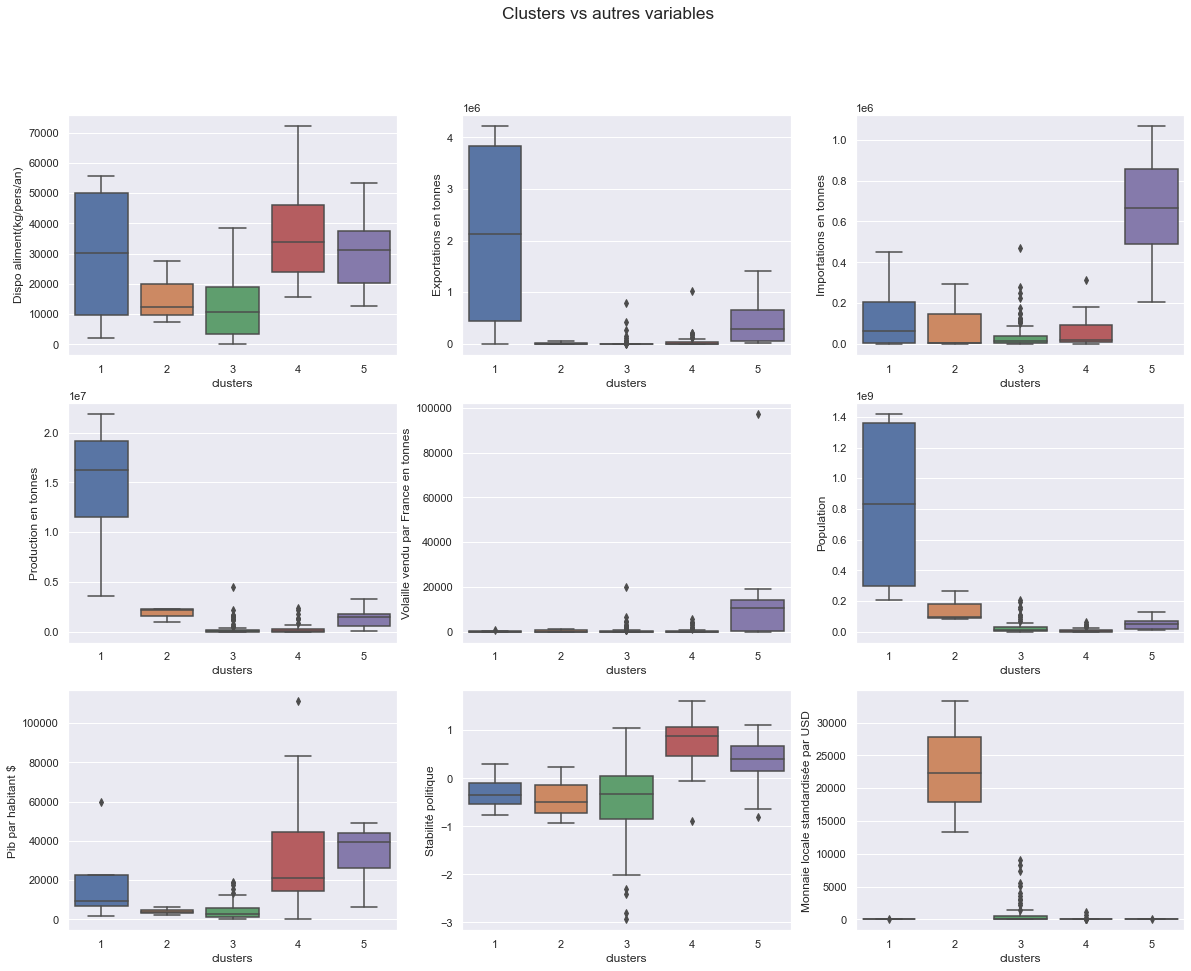

In [66]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
sns.set(font_scale=1.2)
data=df_cah_pca
x='clusters'
fig.suptitle('Clusters vs autres variables')
sns.boxplot(ax=axes[0, 0], data=df_cah_pca, x='clusters', y="Dispo aliment(kg/pers/an)")
sns.boxplot(ax=axes[0, 1], data=df_cah_pca, x='clusters', y="Exportations en tonnes")
sns.boxplot(ax=axes[0, 2], data=df_cah_pca, x='clusters', y='Importations en tonnes')
sns.boxplot(ax=axes[1, 0], data=df_cah_pca, x='clusters', y='Production en tonnes')
sns.boxplot(ax=axes[1, 1], data=df_cah_pca, x='clusters', y='Volaille vendu par France en tonnes')
sns.boxplot(ax=axes[1, 2], data=df_cah_pca, x='clusters', y='Population')
sns.boxplot(ax=axes[2, 0], data=df_cah_pca, x='clusters', y='Pib par habitant $')
sns.boxplot(ax=axes[2, 1], data=df_cah_pca, x='clusters', y='Stabilité politique')
sns.boxplot(ax=axes[2, 2], data=df_cah_pca, x='clusters', y='Monnaie locale standardisée par USD');

In [67]:
df_cah_pca.groupby(by='clusters').mean()

,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD
clusters,,,,,,,,,
1,29565.000000,2.123750e+06,144500.000000,1.447400e+07,158.500000,8.231543e+08,20118.466955,-0.292500,19.017928
2,15680.000000,1.533333e+04,99333.333333,1.797667e+06,400.666667,1.466418e+08,4148.960008,-0.400000,22992.406233
3,12090.377358,1.965094e+04,36933.962264,2.504434e+05,613.915094,2.383254e+07,4134.613119,-0.456698,681.728121
4,35427.446809,5.489362e+04,53914.893617,3.408723e+05,624.170213,9.818898e+06,31131.536579,0.777234,57.295358
5,30394.166667,3.867500e+05,657916.666667,1.331250e+06,15597.750000,5.404178e+07,33934.020494,0.310833,13.737102


In [68]:
# On peut voir les caractéristiques générales des clusters avec l'aide des boxplots pour chaque variable

### Cluster 1 CAH avec ACP

* Les pays leader producteur et exportateur
* Les pays les plus peuplés
* Politiquement ils ne sont pas très stable 

In [69]:
clusters_cah_pca[clusters_cah_pca["clusters"]==1]

,clusters,Pays
21,1,Brésil
34,1,"Chine, continentale"
66,1,Inde
169,1,États-Unis d'Amérique


### Cluster 2 CAH avec ACP

* Les pays économiquement ne sont pas en bon état
* Ils ne sont pas politiquement stable
* Leur monnaie est la plus faible contre US $
* Leur importation n'est pas très forte

In [70]:
clusters_cah_pca[clusters_cah_pca["clusters"]==2]

,clusters,Pays
67,2,Indonésie
68,2,Iran (République islamique d')
162,2,Viet Nam


### Cluster 3 CAH avec ACP

* Les pays qui sont politiquement pas stable
* Leur importation est faible
* Ils ne sont pas économiquement en bon état


In [71]:
clusters_cah_pca[clusters_cah_pca["clusters"]==3]["Pays"].unique()

array(['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Arménie',
       'Azerbaïdjan', 'Bangladesh', 'Belize',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Bulgarie', 'Burkina Faso', 'Bélarus', 'Bénin',
       'Cabo Verde', 'Cambodge', 'Cameroun', 'Colombie', 'Congo',
       'Costa Rica', 'Croatie', "Côte d'Ivoire", 'Djibouti',
       'El Salvador', 'Eswatini', 'Fidji', 'Fédération de Russie',
       'Gabon', 'Gambie', 'Ghana', 'Grèce', 'Guatemala', 'Guinée',
       'Guinée-Bissau', 'Guyana', 'Géorgie', 'Haïti', 'Honduras', 'Iraq',
       'Jordanie', 'Kazakhstan', 'Kenya', 'Kirghizistan', 'Kiribati',
       'Lesotho', 'Lettonie', 'Liban', 'Libéria', 'Macédoine du Nord',
       'Madagascar', 'Malawi', 'Maldives', 'Mali', 'Maroc', 'Mauritanie',
       'Mongolie', 'Monténégro', 'Mozambique', 'Myanmar', 'Namibie',
       'Nicaragua', 'Niger', 'Nigéria', 'Népal', 'Ouganda', 'Ouzbékistan',
       'Pakistan', 'Paraguay', 'Philippines', 'Pérou', 'Roumanie

### Cluster 4 CAH avec ACP

* Les pays qui ont la faible production
* Ils ne sont pas très peuplés
* Leur importation n'est pas très forte
* Leur PIB est bien
* Les pays qui sont politiquement le plus stable

In [72]:
clusters_cah_pca[clusters_cah_pca["clusters"]==4]["Pays"].unique()

array(['Antigua-et-Barbuda', 'Argentine', 'Australie', 'Autriche',
       'Bahamas', 'Barbade', 'Canada', 'Chili', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chypre', 'Cuba', 'Danemark',
       'Dominique', 'Estonie', 'Finlande', 'Grenade', 'Hongrie',
       'Irlande', 'Islande', 'Israël', 'Italie', 'Jamaïque', 'Koweït',
       'Lituanie', 'Luxembourg', 'Malaisie', 'Malte', 'Maurice',
       'Norvège', 'Nouvelle-Calédonie', 'Nouvelle-Zélande', 'Oman',
       'Panama', 'Pologne', 'Polynésie française', 'Portugal',
       'République de Corée', 'Saint-Kitts-et-Nevis',
       'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa',
       'Slovénie', 'Suisse', 'Suède', 'Tchéquie', 'Trinité-et-Tobago'],
      dtype=object)

### Cluster 5 CAH avec ACP

* Les pays qui sont politiquement stable .
* Economiquement et politiquement ils sont en bon état sauf quelques exceptions
* Les pays importent le plus fortement.
* Les pays qui importent déjà volaille de la France.
* **Ils peuvent être notre cible par contre il y a un risque de concurrence.**

In [73]:
clusters_cah_pca[clusters_cah_pca["clusters"]==5]

,clusters,Pays
1,5,Afrique du Sud
4,5,Allemagne
7,5,Arabie saoudite
16,5,Belgique
31,5,Chine - RAS de Hong-Kong
46,5,Espagne
51,5,France
75,5,Japon
98,5,Mexique
117,5,Pays-Bas


In [74]:
clusters_cah_pca[clusters_cah_pca["clusters"]==5]["Pays"].unique()

array(['Afrique du Sud', 'Allemagne', 'Arabie saoudite', 'Belgique',
       'Chine - RAS de Hong-Kong', 'Espagne', 'France', 'Japon',
       'Mexique', 'Pays-Bas',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'Émirats arabes unis'], dtype=object)

#  <a name="C11">    3.3 KMEANS avec ACP </a>

<a href="#top">sommaire</a>

### KMEANS avec ACP

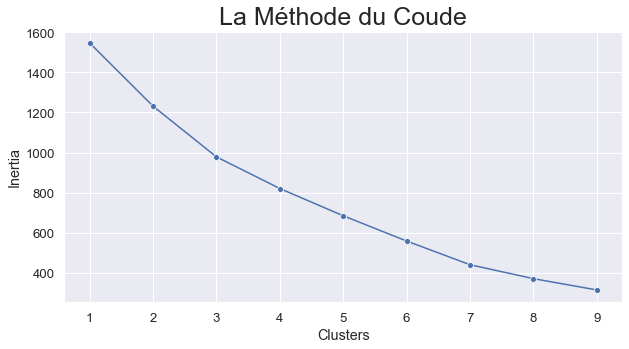

In [75]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1, 10):
    km_elbow = KMeans(n_clusters=i).fit(X_scaled)
    clusters.append(km_elbow.inertia_)
    
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax, marker="o")
ax.set_title('La Méthode du Coude',size=25)
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()

In [76]:
# Avec la méthode coude on peut définir notre nombre de cluster
# Selon le graphique et pour rester le même nombre de cluster de CAH on va utiliser 5 cluster

(172, 9)


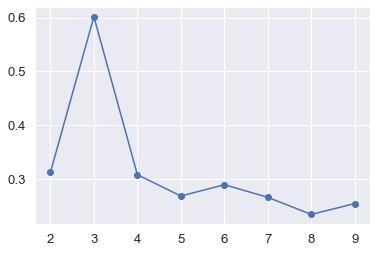

In [77]:
print(X_scaled.shape)

from sklearn import metrics
silhouettes= []
for num_clusters in range (2,10):
    cls=KMeans(n_clusters=num_clusters, n_init=1, init='random')
    cls.fit(X_scaled)
    silh=metrics.silhouette_score(X_scaled,cls.labels_)
    silhouettes.append(silh)
plt.plot(range(2,10),silhouettes, marker="o");


In [78]:
# Le graphique de silhouette nous montre la distance entre les clusters
# On peut choisir 5 clusters selon le graphique

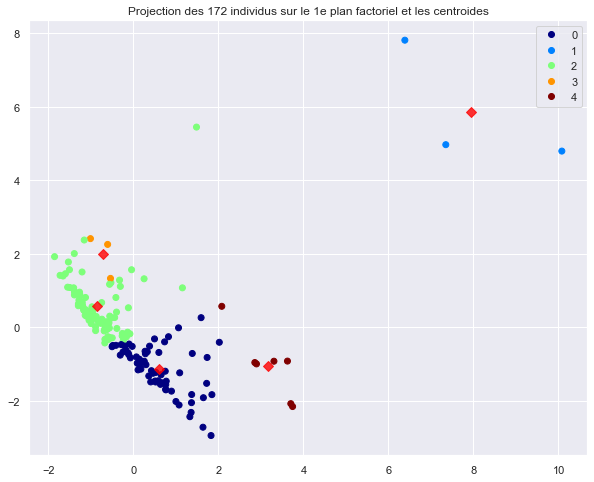

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
sns.set(font_scale=1)
# Nombre de clusters souhaités
n_clust = 5

# import de l'échantillon
data = df

# préparation des données pour le clustering
X = data.values
X_scaled = preprocessing.StandardScaler().fit_transform(X)

pca = decomposition.PCA(n_components=4).fit(X_scaled)
X_projected = pca.transform(X_scaled)

# Clustering par K-means
km_acp = KMeans(n_clusters=n_clust,random_state=3)
km_acp.fit(X_projected)

# Récupération des clusters attribués à chaque individu
clusters = km_acp.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
fig=plt.figure(figsize=(10,8))

scatter=plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters, cmap = 'jet', alpha=1)
classes=["0","1","2","3","4"]
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
#for i,(x,y) in enumerate(X_projected[:,[0,1]]):
                    #plt.text(x, y, df.index[i], fontsize='13')(si on voulait display les noms des individus)

plt.title("Projection des {} individus sur le 1e plan factoriel et les centroides".format(X_projected.shape[0]))

# On définit les cluster centers: centroids
centroids=np.array(km_acp.cluster_centers_)
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# On fait un scatter plot des centroids_x et centroids_y
plt.scatter(centroids_x,centroids_y,marker='D',s=50,c="red",alpha=0.8)

plt.show()



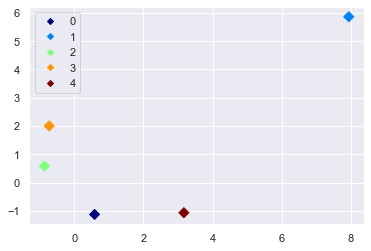

In [80]:
# On montre les cluster centers: centroids

centroids=np.array(km_acp.cluster_centers_)
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
classes=["0","1","2","3","4"]
# On fait un scatter plot des centroids_x and centroids_y
scatter=plt.scatter(centroids_x,centroids_y,marker='D',s=50,c=[0,1,2,3,4],cmap='jet')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.show()

In [81]:
liste_pays_km_acp=pd.DataFrame({"Pays":df.index,"Clusters":clusters})
liste_pays_km_acp.head()

,Pays,Clusters
0,Afghanistan,2
1,Afrique du Sud,0
2,Albanie,2
3,Algérie,2
4,Allemagne,4


In [82]:
liste_pays_km_acp["Clusters"].value_counts()

2    95
0    64
4     7
1     3
3     3
Name: Clusters, dtype: int64

#  <a name="C12">    3.4 Les définitions des clusters KMeans avec ACP </a>

<a href="#top">sommaire</a>

In [83]:
df_km_acp=pd.merge(df,liste_pays_km_acp,on="Pays",how='inner')
df_km_acp.head()

,Pays,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD,Clusters
0,Afghanistan,1530.0,0.0,29000.0,28000.0,244.0,36296113.0,520.616409,-2.80,68.026904,2
1,Afrique du Sud,35690.0,63000.0,514000.0,1667000.0,0.0,57009756.0,6121.876572,-0.28,13.333781,0
2,Albanie,16360.0,0.0,38000.0,13000.0,78.0,2884169.0,4514.204908,0.38,119.099667,2
3,Algérie,6380.0,0.0,2000.0,275000.0,0.0,41389189.0,4109.696001,-0.92,110.973017,2
4,Allemagne,19470.0,646000.0,842000.0,1514000.0,18920.0,82658409.0,44651.829102,0.59,0.885206,4


In [84]:
df_km_acp.groupby(by='Clusters').mean()

,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD
Clusters,,,,,,,,,
0,32527.031250,6.625000e+04,76000.000000,3.485469e+05,1040.375000,1.080240e+07,27146.593410,0.694219,57.524430
1,38680.000000,2.830333e+06,192666.666667,1.811700e+07,211.333333,6.513135e+08,26171.159160,-0.136667,3.650048
2,10655.368421,2.055789e+04,37694.736842,3.078842e+05,646.336842,4.025755e+07,3407.160981,-0.586737,751.150343
3,15680.000000,1.533333e+04,99333.333333,1.797667e+06,400.666667,1.466418e+08,4148.960008,-0.400000,22992.406233
4,31375.714286,4.450000e+05,842714.285714,1.504571e+06,21942.571429,6.558497e+07,35651.082083,0.342857,20.740474


Populating the interactive namespace from numpy and matplotlib


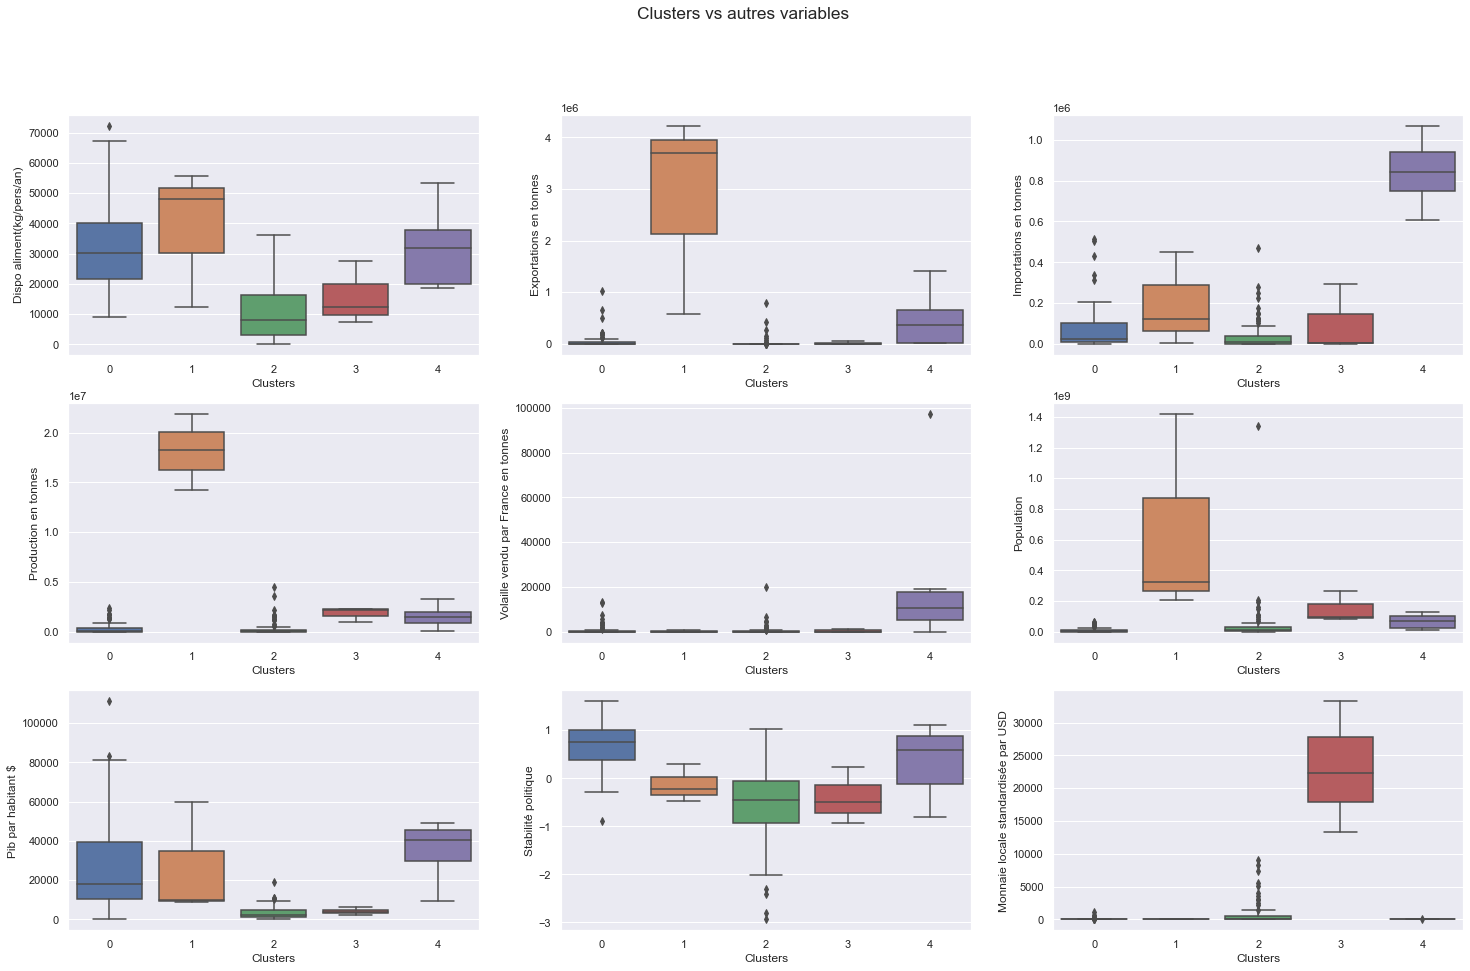

In [85]:
%pylab inline
fig, axes = plt.subplots(3, 3, figsize=(25, 15))
sns.set(font_scale=1.2)
data=df_km_acp
x='Clusters'
fig.suptitle('Clusters vs autres variables')
sns.boxplot(ax=axes[0, 0], data=df_km_acp, x='Clusters', y="Dispo aliment(kg/pers/an)")
sns.boxplot(ax=axes[0, 1], data=df_km_acp, x='Clusters', y="Exportations en tonnes")
sns.boxplot(ax=axes[0, 2], data=df_km_acp, x='Clusters', y='Importations en tonnes')
sns.boxplot(ax=axes[1, 0], data=df_km_acp, x='Clusters', y='Production en tonnes')
sns.boxplot(ax=axes[1, 1], data=df_km_acp, x='Clusters', y='Volaille vendu par France en tonnes')
sns.boxplot(ax=axes[1, 2], data=df_km_acp, x='Clusters', y='Population')
sns.boxplot(ax=axes[2, 0], data=df_km_acp, x='Clusters', y='Pib par habitant $')
sns.boxplot(ax=axes[2, 1], data=df_km_acp, x='Clusters', y='Stabilité politique')
sns.boxplot(ax=axes[2, 2], data=df_km_acp, x='Clusters', y='Monnaie locale standardisée par USD');
#plt.show();

In [86]:
# On peut voir les caractéristiques générales des clusters avec l'aides des boxplots pour chaque variable

### Cluster 0 KMEANS avec PCA 

* Les pays qui ont faible production
* Leur importation n'est pas très forte
* Leur PIB est bien
* Les pays qui sont politiquement stable

In [87]:
liste_pays_km_acp[liste_pays_km_acp["Clusters"]==0]["Pays"].unique()

array(['Afrique du Sud', 'Antigua-et-Barbuda', 'Argentine', 'Australie',
       'Autriche', 'Bahamas', 'Barbade', 'Belgique', 'Bulgarie',
       'Cabo Verde', 'Canada', 'Chili', 'Chine - RAS de Macao',
       'Chine, Taiwan Province de', 'Chypre', 'Costa Rica', 'Croatie',
       'Cuba', 'Danemark', 'Dominique', 'Espagne', 'Estonie', 'Fidji',
       'Finlande', 'France', 'Grenade', 'Guyana', 'Hongrie', 'Irlande',
       'Islande', 'Israël', 'Italie', 'Jamaïque', 'Kiribati', 'Koweït',
       'Lettonie', 'Lituanie', 'Luxembourg', 'Malaisie', 'Malte',
       'Maurice', 'Norvège', 'Nouvelle-Calédonie', 'Nouvelle-Zélande',
       'Oman', 'Panama', 'Pologne', 'Polynésie française', 'Portugal',
       'République de Corée', 'République dominicaine',
       'Saint-Kitts-et-Nevis', 'Saint-Vincent-et-les Grenadines',
       'Sainte-Lucie', 'Samoa', 'Slovaquie', 'Slovénie', 'Suisse',
       'Suriname', 'Suède', 'Tchéquie', 'Trinité-et-Tobago', 'Uruguay',
       'Émirats arabes unis'], dtype=object

### Cluster 1 KMEANS avec PCA 

* Les pays leader producteur et exportateur
* Les pays les plus peuplés
* Ils ne sont pas politiquement très stable

In [88]:
liste_pays_km_acp[liste_pays_km_acp["Clusters"]==1]["Pays"].unique()

array(['Brésil', 'Chine, continentale', "États-Unis d'Amérique"],
      dtype=object)

### Cluster 2 KMEANS avec PCA 

* Les pays économiquement ne sont pas en bon état
* Ils ne sont pas politiquement stable
* Leur importation est faible

In [89]:
liste_pays_km_acp[liste_pays_km_acp["Clusters"]==2]["Pays"].unique()

array(['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Arménie',
       'Azerbaïdjan', 'Bangladesh', 'Belize',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cambodge',
       'Cameroun', 'Colombie', 'Congo', "Côte d'Ivoire", 'Djibouti',
       'El Salvador', 'Eswatini', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grèce', 'Guatemala', 'Guinée', 'Guinée-Bissau',
       'Géorgie', 'Haïti', 'Honduras', 'Inde', 'Iraq', 'Jordanie',
       'Kazakhstan', 'Kenya', 'Kirghizistan', 'Lesotho', 'Liban',
       'Libéria', 'Macédoine du Nord', 'Madagascar', 'Malawi', 'Maldives',
       'Mali', 'Maroc', 'Mauritanie', 'Mongolie', 'Monténégro',
       'Mozambique', 'Myanmar', 'Namibie', 'Nicaragua', 'Niger',
       'Nigéria', 'Népal', 'Ouganda', 'Ouzbékistan', 'Pakistan',
       'Paraguay', 'Philippines', 'Pérou', 'Roumanie', 'Rwanda',
       'République centrafricaine', 'République de Moldova',
       'République 

### Cluster 3 KMEANS avec PCA 

* Les pays économiquement ne sont pas en bon état
* Ils ne sont pas politiquement stable
* Leur monnaie est la plus faible contre US $
* Leur importation n'est pas très forte

In [90]:
liste_pays_km_acp[liste_pays_km_acp["Clusters"]==3]["Pays"].unique()

array(['Indonésie', "Iran (République islamique d')", 'Viet Nam'],
      dtype=object)

### Cluster 4 KMEANS avec PCA 

* Les pays qui sont politiquement stable .
* Economiquement et politiquement ils sont en bon état sauf qq exceptions
* Les pays importent le plus fortement.
* Les pays qui importent déjà volaille de la France.
* **Ils peuvent être notre cible par contre il y a un risque de concurrence.**

In [91]:
liste_pays_km_acp[liste_pays_km_acp["Clusters"]==4]["Pays"].unique()

array(['Allemagne', 'Arabie saoudite', 'Chine - RAS de Hong-Kong',
       'Japon', 'Mexique', 'Pays-Bas',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord"],
      dtype=object)

#  <a name="C13">    3.5 Les centroïdes et La Heatmap avec les clusters avec ACP </a>

<a href="#top">sommaire</a>

### Les centroïdes

In [92]:
centroids=km_acp.cluster_centers_

In [93]:
#On obtient les coordonnées des centroides
centroids

array([[ 0.59034565, -1.12239724, -0.48499397,  0.04864533],
       [ 7.93771197,  5.86343006, -2.10731088, -0.4401749 ],
       [-0.8593383 ,  0.58594891,  0.11350333, -0.22175833],
       [-0.72010408,  2.00389346,  0.40670577,  6.21380463],
       [ 3.17174191, -1.06195627,  3.62265906,  0.09040721]])

In [94]:
df_centr_value=pd.DataFrame(centroids,columns=["comp_"+str(i) for i in range(1,5) ]).T

df_centr_value

,0,1,2,3,4
comp_1,0.590346,7.937712,-0.859338,-0.720104,3.171742
comp_2,-1.122397,5.863430,0.585949,2.003893,-1.061956
comp_3,-0.484994,-2.107311,0.113503,0.406706,3.622659
comp_4,0.048645,-0.440175,-0.221758,6.213805,0.090407


### La Heatmap

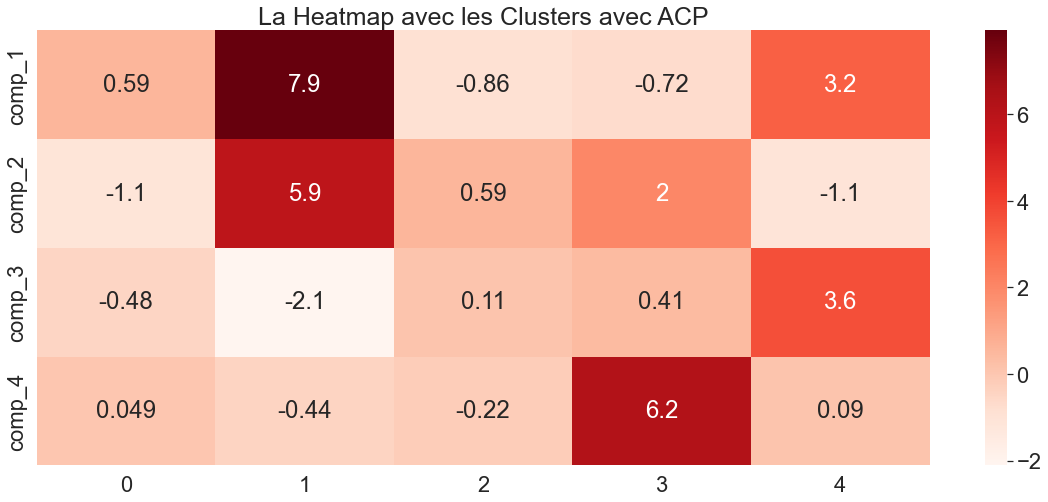

In [95]:
fig=plt.figure(figsize=(20,8))
sns.set(font_scale=2)
plt.title("La Heatmap avec les Clusters avec ACP",size=25)
sns.heatmap(df_centr_value, annot = True,cmap="Reds");

Les définitions des composantes

* comp_1 = Production et Exportation
* comp_2 = Population et Stabilité politique(négativement corrélée)
* comp_3 = Importation et Volaille vendu par la France
* comp_4 = Monnaie locale et Stabilité politique 

### Les analyses avec heatmap sont cohérantes avec nos analyses précedentes

Cluster 0 selon la heatmap

* Les pays qui ont faible production
* Leur population est faible
* Leur importation est faible
* Les pays qui sont politiquement stable
* Leur monnaie est forte contre US $


Cluster 1 selon la heatmap
* Les pays leader producteur et exportateur .
* Les pays le plus peuplés
* Leur importation est trés faible.
* Leur monnaie est forte contre $

Cluster 2 selon la heatmap
* Les pays qui ont faible production et exportation.
* Leur population est faible aussi.
* Leur importation est faible.
* Les pays qui ne sont pas politiquement stable

Cluster 3 selon la heatmap
* Leur production et exportation est faible
* Leur importation est faible aussi
* Leur monnaie est la plus faible contre $

Cluster 4 selon la heatmap
* Les qui produisent la volaille mais ils importent aussi.
* Les pays importent le plus fortement.
* Les pays déjà importent la volaille de la France.
* Les pays qui sont politiquement stable
* **Ils peuvent être notre cible par contre il y a un risque de concurence.**


# <a name="C18"> 3.6 Les analyses avec 3 composantes</a>

<a href="#top">sommaire</a>

On vois que l'indicateuer de "La monnaie locale standardisé par USD" n'est pas très important pour nos analyses. Alors on va faire une analyse supplémentaire avec 3 composantes 

In [96]:
# On voit les sommes cumulative des variances expliquées
from sklearn import decomposition
pca=decomposition.PCA()
pca.fit(X_scaled)
print (pca.explained_variance_ratio_.cumsum())
X_trans=pca.transform(X_scaled)

[0.26948897 0.48371451 0.62704617 0.73433918 0.82142481 0.88876587
 0.94634668 0.98938656 1.        ]


In [97]:
# On peut garder toujours 63% de notre data

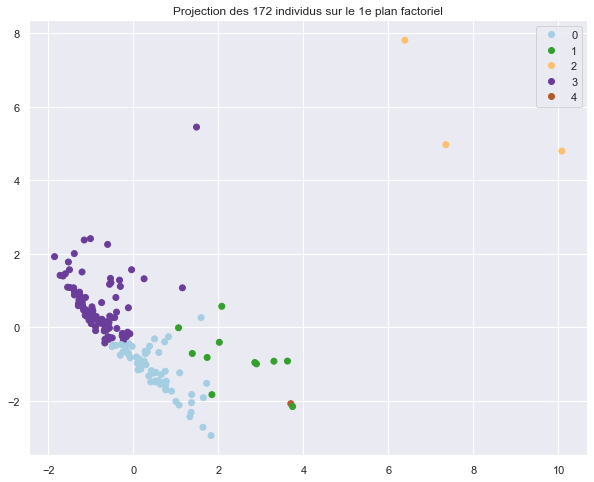

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
sns.set(font_scale=1)
# Nombre de clusters souhaités
n_clust = 5

# import de l'échantillon
data = df

# préparation des données pour le clustering
X = data.values
X_scaled = preprocessing.StandardScaler().fit_transform(X)

pca3= decomposition.PCA(n_components=3).fit(X_scaled)
X_projected3 = pca3.transform(X_scaled)

# Clustering par K-means
km_acp3 = KMeans(n_clusters=n_clust,random_state=3)
km_acp3.fit(X_projected3)

# Récupération des clusters attribués à chaque individu
clusters3 = km_acp3.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
fig=plt.figure(figsize=(10,8))

scatter=plt.scatter(X_projected3[:, 0], X_projected3[:, 1], c=clusters3, cmap = 'Paired', alpha=1)
classes=["0","1","2","3","4"]
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
#for i,(x,y) in enumerate(X_projected[:,[0,1]]):
                    #plt.text(x, y, df.index[i], fontsize='13')(si on voulait display les noms des individus)

plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected3.shape[0]))
plt.show()



In [99]:
liste_pays_km_acp3=pd.DataFrame({"Pays":df.index,"Clusters":clusters3})
liste_pays_km_acp3.head()

,Pays,Clusters
0,Afghanistan,3
1,Afrique du Sud,1
2,Albanie,3
3,Algérie,3
4,Allemagne,1


In [100]:
liste_pays_km_acp3["Clusters"].value_counts()

3    98
0    59
1    11
2     3
4     1
Name: Clusters, dtype: int64

In [101]:
liste_pays_km_acp3[liste_pays_km_acp3["Clusters"]==0]["Pays"].unique()

array(['Antigua-et-Barbuda', 'Argentine', 'Australie', 'Autriche',
       'Bahamas', 'Barbade', 'Bulgarie', 'Cabo Verde', 'Canada', 'Chili',
       'Chine - RAS de Macao', 'Chine, Taiwan Province de', 'Chypre',
       'Costa Rica', 'Croatie', 'Cuba', 'Danemark', 'Dominique',
       'Estonie', 'Fidji', 'Finlande', 'Grenade', 'Guyana', 'Hongrie',
       'Irlande', 'Islande', 'Israël', 'Italie', 'Jamaïque', 'Kiribati',
       'Koweït', 'Lettonie', 'Lituanie', 'Luxembourg', 'Malaisie',
       'Malte', 'Maurice', 'Norvège', 'Nouvelle-Calédonie',
       'Nouvelle-Zélande', 'Oman', 'Panama', 'Pologne',
       'Polynésie française', 'Portugal', 'République de Corée',
       'République dominicaine', 'Saint-Kitts-et-Nevis',
       'Saint-Vincent-et-les Grenadines', 'Sainte-Lucie', 'Samoa',
       'Slovaquie', 'Slovénie', 'Suisse', 'Suriname', 'Suède', 'Tchéquie',
       'Trinité-et-Tobago', 'Uruguay'], dtype=object)

In [102]:
liste_pays_km_acp3[liste_pays_km_acp3["Clusters"]==1]["Pays"].unique()

array(['Afrique du Sud', 'Allemagne', 'Belgique',
       'Chine - RAS de Hong-Kong', 'Espagne', 'France', 'Japon',
       'Mexique', 'Pays-Bas',
       "Royaume-Uni de Grande-Bretagne et d'Irlande du Nord",
       'Émirats arabes unis'], dtype=object)

In [103]:
liste_pays_km_acp3[liste_pays_km_acp3["Clusters"]==2]["Pays"].unique()

array(['Brésil', 'Chine, continentale', "États-Unis d'Amérique"],
      dtype=object)

In [104]:
liste_pays_km_acp3[liste_pays_km_acp3["Clusters"]==3]["Pays"].unique()

array(['Afghanistan', 'Albanie', 'Algérie', 'Angola', 'Arménie',
       'Azerbaïdjan', 'Bangladesh', 'Belize',
       'Bolivie (État plurinational de)', 'Bosnie-Herzégovine',
       'Botswana', 'Burkina Faso', 'Bélarus', 'Bénin', 'Cambodge',
       'Cameroun', 'Colombie', 'Congo', "Côte d'Ivoire", 'Djibouti',
       'El Salvador', 'Eswatini', 'Fédération de Russie', 'Gabon',
       'Gambie', 'Ghana', 'Grèce', 'Guatemala', 'Guinée', 'Guinée-Bissau',
       'Géorgie', 'Haïti', 'Honduras', 'Inde', 'Indonésie',
       "Iran (République islamique d')", 'Iraq', 'Jordanie', 'Kazakhstan',
       'Kenya', 'Kirghizistan', 'Lesotho', 'Liban', 'Libéria',
       'Macédoine du Nord', 'Madagascar', 'Malawi', 'Maldives', 'Mali',
       'Maroc', 'Mauritanie', 'Mongolie', 'Monténégro', 'Mozambique',
       'Myanmar', 'Namibie', 'Nicaragua', 'Niger', 'Nigéria', 'Népal',
       'Ouganda', 'Ouzbékistan', 'Pakistan', 'Paraguay', 'Philippines',
       'Pérou', 'Roumanie', 'Rwanda', 'République centrafricaine

In [105]:
liste_pays_km_acp3[liste_pays_km_acp3["Clusters"]==4]["Pays"].unique()

array(['Arabie saoudite'], dtype=object)

In [106]:
# On va cibler les pays de clusters 1 et 4
# L'Arabie Saoudite est le pays qui import le plus grande montante de la volaille de la France alors on va ajouter ce pays avec cluster 1

In [107]:
df.sort_values(by='Volaille vendu par France en tonnes',ascending=False).head()

,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD
Pays,,,,,,,,,
Arabie saoudite,43360.0,10000.0,722000.0,616000.0,97510.0,33101179.0,20802.464299,-0.64,3.750000
Bénin,14400.0,0.0,123000.0,18000.0,19991.0,11175198.0,1136.593360,0.03,580.656750
Allemagne,19470.0,646000.0,842000.0,1514000.0,18920.0,82658409.0,44651.829102,0.59,0.885206
Pays-Bas,20330.0,1418000.0,608000.0,1100000.0,16149.0,17021347.0,48989.638816,0.92,0.885206
Espagne,30390.0,212000.0,205000.0,1515000.0,13441.0,46647428.0,28137.441564,0.28,0.885206


In [108]:
X_3comp=pd.DataFrame(X_projected3, columns = ['comp_1','comp_2','comp_3'])

In [109]:
X_3comp.head()

,comp_1,comp_2,comp_3
0,-1.856405,1.926979,0.843980
1,1.060368,-0.009532,1.084940
2,-0.557535,-0.274659,-0.278963
3,-1.128617,0.815645,0.085225
4,3.304945,-0.919193,3.265040


In [110]:
X_3comp["Pays"]=df.index
X_3comp.head()

,comp_1,comp_2,comp_3,Pays
0,-1.856405,1.926979,0.843980,Afghanistan
1,1.060368,-0.009532,1.084940,Afrique du Sud
2,-0.557535,-0.274659,-0.278963,Albanie
3,-1.128617,0.815645,0.085225,Algérie
4,3.304945,-0.919193,3.265040,Allemagne


In [111]:
df_km_3comp=pd.merge(X_3comp,liste_pays_km_acp3,on="Pays",how='inner')
df_km_3comp.head()

,comp_1,comp_2,comp_3,Pays,Clusters
0,-1.856405,1.926979,0.843980,Afghanistan,3
1,1.060368,-0.009532,1.084940,Afrique du Sud,1
2,-0.557535,-0.274659,-0.278963,Albanie,3
3,-1.128617,0.815645,0.085225,Algérie,3
4,3.304945,-0.919193,3.265040,Allemagne,1


In [112]:
# IMPORTANT !
# Si le graphique en 3D ne s'affiche pas vous pouvez faire ces démarches
# Make this Notebook Trusted to load graphique: File -> Trust Notebook
# Ou vous pouvez éxecuter les codes avec les fichier csv dans les livrables
# Sinon on peut voir l'image en capture d'écran en dessous

In [113]:
# Changement 'Clusters' à string
df_km_3comp['Clusters'] = df_km_3comp['Clusters'].astype(str)
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
# Import module
import plotly.express as px
# Visualization de resultat
fig = px.scatter_3d(df_km_3comp, x='comp_1', y='comp_2', z='comp_3',
              color=df_km_3comp['Clusters'])
fig.show()

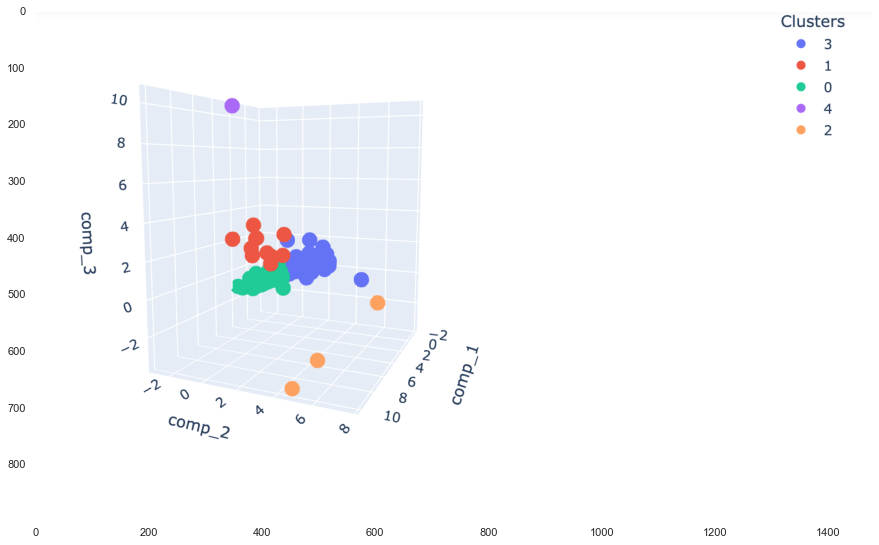

In [114]:
# importer matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = False
# lire Images
img = mpimg.imread('graph_3D.png')
fig=plt.figure(figsize=(15,12)) 
# Output Images
plt.imshow(img);

* comp_1 = Production et Exportation
* comp_2 = Population et Stabilité politique(négativement corrélé)
* comp_3 = Importation et Volaille vendu par la France

## Avec un graphique 3 composante et 3D on peut voir les clusters plus clairement et il n'y a pas de grand différence pour nos pays cibles

#  <a name="C17">3.7 La comparaison des nombres des pays par chaque cluster pour chaque méthode de clustering</a>

<a href="#top">sommaire</a>

### CAH Sans ACP

In [115]:
clusters_cah["clusters"].value_counts()

3    89
4    68
5    11
1     2
2     2
Name: clusters, dtype: int64

### KMeans Sans ACP

In [116]:
liste_pays_km["Clusters"].value_counts()

0    101
1     60
3      7
4      2
2      2
Name: Clusters, dtype: int64

### CAH Avec ACP

In [117]:
clusters_cah_pca["clusters"].value_counts()

3    106
4     47
5     12
1      4
2      3
Name: clusters, dtype: int64

### KMeans Avec ACP

In [118]:
liste_pays_km_acp["Clusters"].value_counts()

2    95
0    64
4     7
1     3
3     3
Name: Clusters, dtype: int64

### KMeans Avec ACP en 3 composantes

In [119]:
liste_pays_km_acp3["Clusters"].value_counts()

3    98
0    59
1    11
2     3
4     1
Name: Clusters, dtype: int64

### Il n'y a pas trés grand écart entre les nombres des pays par clusters sans et avec ACP parce qu'on a pas beaucoup variable(9) mais si on avait 100 variable par exemple on pourrait voir la différence plus claire.

#  <a name="C14">   Les Clusters KMeans avec ACP montrés sur la carte mondiale </a>

<a href="#top">sommaire</a>

GEO MAPPING

In [120]:
import folium 

In [121]:
# On crée un dataframe avec les pays et leur coordonnées
liste_pays_coord_fin=pd.read_csv('liste_pays_coord_fin.csv')

In [122]:
liste_pays_coord_fin.head()

,Pays,Latitude,Longitude
0,Afghanistan,33.00,65.0
1,Albanie,41.00,20.0
2,Antarctique,-90.00,0.0
3,Algérie,28.00,3.0
4,Samoa américaines,-14.33,-170.0


In [123]:
# On fait la jointure entre les coordonnées et le dataframe clusters avec KMeans avec ACP
clusters_coord=pd.merge(liste_pays_coord_fin,df_km_acp,how="inner",on="Pays")
clusters_coord.head()

,Pays,Latitude,Longitude,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD,Clusters
0,Afghanistan,33.00,65.0,1530.0,0.0,29000.0,28000.0,244.0,36296113.0,520.616409,-2.80,68.026904,2
1,Albanie,41.00,20.0,16360.0,0.0,38000.0,13000.0,78.0,2884169.0,4514.204908,0.38,119.099667,2
2,Algérie,28.00,3.0,6380.0,0.0,2000.0,275000.0,0.0,41389189.0,4109.696001,-0.92,110.973017,2
3,Angola,-12.50,18.5,10560.0,0.0,277000.0,42000.0,203.0,29816766.0,4095.811686,-0.38,165.915951,2
4,Antigua-et-Barbuda,17.05,-61.8,54100.0,0.0,7000.0,0.0,0.0,95426.0,15383.415188,0.75,2.700000,0


In [124]:
clusters_coord.isnull().sum()

Pays                                   0
Latitude                               0
Longitude                              0
Dispo aliment(kg/pers/an)              0
Exportations en tonnes                 0
Importations en tonnes                 0
Production en tonnes                   0
Volaille vendu par France en tonnes    0
Population                             0
Pib par habitant $                     0
Stabilité politique                    0
Monnaie locale standardisée par USD    0
Clusters                               0
dtype: int64

In [125]:
country=clusters_coord.loc[0]

In [126]:
# On défini une carte avec les coordonnnées des pays
my_map=folium.Map(location=[33.00,65.00],zoom_start=2)

In [127]:
country=liste_pays_coord_fin.loc[0]
folium.Marker(location=[country["Latitude"],country["Longitude"]]).add_to(my_map)


In [128]:
# On fait une fonction pour donner la couleur par chaque cluster

# Cluster 0 violet
# Cluster 1 orange
# Cluster 2 rouge
# Cluster 3 bleu
# Cluster 4 vert (Nos Pays Cibles)
def select_marker_color(row):
    if row['Clusters'] == 0:
        return 'purple'
    elif row['Clusters'] == 1:
        return 'orange'
    elif row['Clusters'] == 2:
        return 'red'
    elif row['Clusters'] == 3:
        return 'blue' 
    return 'green' 

In [129]:
# On ajoute une colonne pour les couleurs des clusters
clusters_coord['colors'] = clusters_coord.apply(select_marker_color, axis=1)
clusters_coord.head()

,Pays,Latitude,Longitude,Dispo aliment(kg/pers/an),Exportations en tonnes,Importations en tonnes,Production en tonnes,Volaille vendu par France en tonnes,Population,Pib par habitant $,Stabilité politique,Monnaie locale standardisée par USD,Clusters,colors
0,Afghanistan,33.00,65.0,1530.0,0.0,29000.0,28000.0,244.0,36296113.0,520.616409,-2.80,68.026904,2,red
1,Albanie,41.00,20.0,16360.0,0.0,38000.0,13000.0,78.0,2884169.0,4514.204908,0.38,119.099667,2,red
2,Algérie,28.00,3.0,6380.0,0.0,2000.0,275000.0,0.0,41389189.0,4109.696001,-0.92,110.973017,2,red
3,Angola,-12.50,18.5,10560.0,0.0,277000.0,42000.0,203.0,29816766.0,4095.811686,-0.38,165.915951,2,red
4,Antigua-et-Barbuda,17.05,-61.8,54100.0,0.0,7000.0,0.0,0.0,95426.0,15383.415188,0.75,2.700000,0,purple


In [130]:
# clusters_coord.to_csv('clusters_coord_km.csv')

In [131]:
# IMPORTANT !
# Si la carte ne s'affiche pas vous pouvez faire ces démarches
# Make this Notebook Trusted to load map: File -> Trust Notebook
# Ou vous pouvez éxecuter les codes avec les fichier csv dans les livrables
# Sinon on peut voir l'image en capture d'écran en dessous

In [132]:
my_map=folium.Map(location=[33.00,65.00],zoom_start=2)

for _, country in clusters_coord.iterrows():
    folium.Marker(
        location=[country['Latitude'], country['Longitude']],
        popup=country['Pays'],
        tooltip=country['Pays'],
        icon=folium.Icon(color=country['colors'], prefix='fa', icon='circle')
    ).add_to(my_map)
my_map

In [133]:
# Si la carte mondiale ne s'affiche pas on peut voir l'image en dessous
# Vous pouvez éxecuter les codes aussi avec les fichier csv dans les livrables

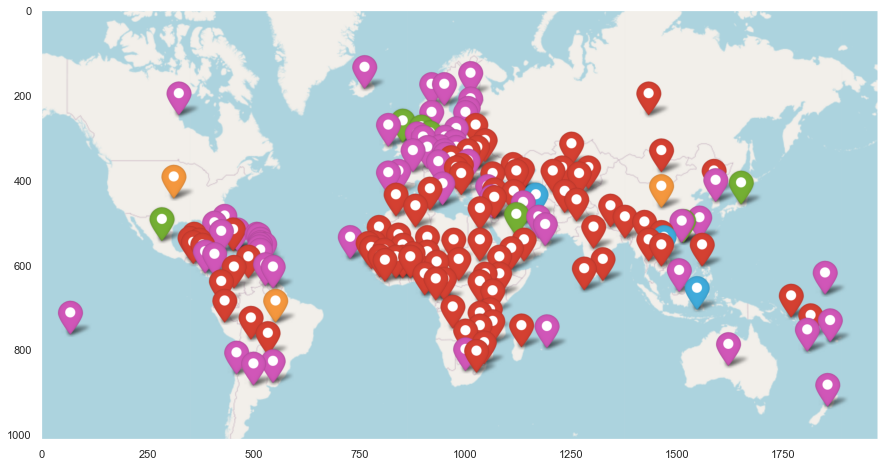

In [134]:
# lire Images
img_map = mpimg.imread('carte_cls_km_acp.png')
fig=plt.figure(figsize=(15,12)) 
# Output Images
plt.imshow(img_map);

In [135]:
#my_map.save('my_map.html')

#  <a name="C15"> Conclusion et Récommandations</a>

<a href="#top">sommaire</a>

### Conclusion et Récommendations

## Les pays cible CAH sans ACP ( 10 pays )

* Allemagne
* Arabie saoudite
* Belgique
* Chine - RAS de Hong-Kong
* Espagne
* Japon
* Mexique
* Pays-Bas
* Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
* Émirats arabes unis

## Les pays cible K means sans ACP ( 7 pays )


* Allemagne
* Arabie saoudite
* Chine - RAS de Hong-Kong
* Japon
* Mexique
* Pays-Bas
* Royaume-Uni de Grande-Bretagne et d'Irlande du Nord

## Les pays cible CAH avec ACP ( 11 pays )

* Afrique du Sud
* Allemagne
* Arabie saoudite
* Belgique
* Chine - RAS de Hong-Kong
* Espagne
* Japon
* Mexique
* Pays-Bas
* Royaume-Uni de Grande-Bretagne et d'Irlande du Nord
* Émirats arabes unis

## Les pays cible K means avec ACP en 4 composantes ( 8 pays ) 

* Allemagne
* Arabie saoudite
* Belgique
* Chine - RAS de Hong-Kong
* Japon
* Mexique
* Pays-Bas
* Royaume-Uni de Grande-Bretagne et d'Irlande du Nord

## Les pays cible K means avec ACP en 3 composantes ( 11 pays ) 

* Arabie saoudite (ce pays était dans un atres cluster mais il peut être notre cible)
* Afrique du Sud
* Allemagne
* Belgique
* Chine - RAS de Hong-Kong
* Espagne
* Émirats arabes unis
* Japon
* Mexique
* Pays-Bas
* Royaume-Uni de Grande-Bretagne et d'Irlande du Nord

In [136]:
# On a exclue la France des clusters

# Recommandations 

* On peut cibler ces 11 pays pour notre plan d'exportation.
* Par contre pour les pays qui sont loin de la Fance (Afrique du Sud, Chine - RAS de Hong-Kong, Mexique, Japon, Arabie saoudite et Émirats arabes unis) on doit faire une étude pour les couts de transport
* On doit aussi faire attention à la concurrence parce que ces pays ils importent déjà la volaille de France

#  <a name="C16"> Sources</a>

<a href="#top">sommaire</a>

* https://openclassrooms.com/fr/courses/4525281-realisez-une-analyse-exploratoire-de-donnees
* https://openclassrooms.com/fr/courses/4379436-explorez-vos-donnees-avec-des-algorithmes-non-supervises
* https://www.youtube.com/watch?v=uV5hmpzmWsU
* https://github.com/jtemporal/folium-101/blob/main/folium-101.ipynb